In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-sales-prices-prediction/sample_submission.csv
/kaggle/input/house-prices-sales-prices-prediction/data_description.txt
/kaggle/input/house-prices-sales-prices-prediction/train.csv
/kaggle/input/house-prices-sales-prices-prediction/test.csv


# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



# Read Data

In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-sales-prices-prediction/train.csv')

In [4]:
test_df = pd.read_csv('/kaggle/input/house-prices-sales-prices-prediction/test.csv')

In [5]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
missing_in_test = set(train_df.columns) - set(test_df.columns)
missing_in_train = set(test_df.columns) - set(train_df.columns)

print(f"Columns in train but not in test: {missing_in_test}")
print(f"Columns in test but not in train: {missing_in_train}")

Columns in train but not in test: {'SalePrice'}
Columns in test but not in train: set()


# Data Preprocessing

In [9]:
test_ids = test_df["Id"]
train_df.drop(columns="Id",inplace=True)
test_df.drop(columns="Id",inplace=True)

In [10]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Missing Values in Each Column Plot for train_df

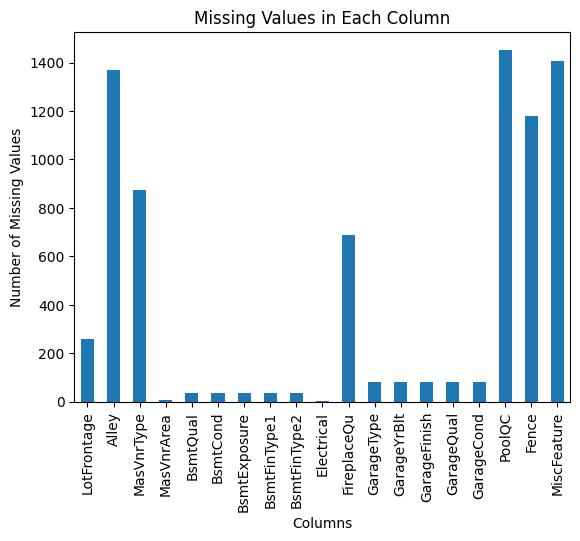

In [11]:
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [13]:
missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print(missing_values_test)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


# Missing Values in Each Column Plot for test_df

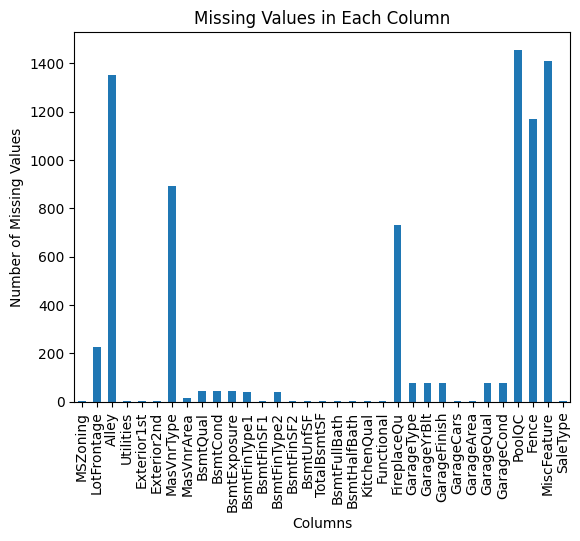

In [14]:
missing_values_test.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

# Precentage for Missing Values Respect to train_df

In [15]:
missing_value_df = round(train_df.isnull().sum()/len(train_df)*100,2).sort_values().to_frame().rename(columns=
                                                                                    {0:"Train % of Missing Values"})
missing_value_df["Test % of Missing Values"] = round(test_df.isnull().sum()/len(test_df)*100,2)

In [16]:
missing_value_df

Train % of Missing Values  Test % of Missing Values
MSSubClass                          0.00                      0.00
TotalBsmtSF                         0.00                      0.07
Heating                             0.00                      0.00
SaleCondition                       0.00                      0.00
CentralAir                          0.00                      0.00
...                                  ...                       ...
MasVnrType                         59.73                     61.27
Fence                              80.75                     80.12
Alley                              93.77                     92.67
MiscFeature                        96.30                     96.50
PoolQC                             99.52                     99.79

[80 rows x 2 columns]

# Columns with Missing Values Greater Than Threshold

In [17]:
threshold = 45
missing_value_df[
    (missing_value_df['Train % of Missing Values'] > threshold) |
    (missing_value_df['Test % of Missing Values'] > threshold)
]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.03
MasVnrType                       59.73                     61.27
Fence                            80.75                     80.12
Alley                            93.77                     92.67
MiscFeature                      96.30                     96.50
PoolQC                           99.52                     99.79

In [18]:
col = ['FireplaceQu','MasVnrType','Fence','Alley','MiscFeature','PoolQC']
train_df.drop(columns = col, inplace=True)
test_df.drop(columns = col, inplace=True)

In [19]:
train_df.shape

(1460, 74)

In [20]:
test_df.shape

(1459, 73)

In [21]:
train_df.describe(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1460       1460       1460  ...       1459        1460   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            225       1260       1445  ...       1334         735   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1460       1379         1379       1379       1379       1460   
unique          7          6            3          5          5          3   
top           Typ     Attchd          Unf         TA         TA          Y   
freq         1360        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 37 columns]

In [22]:
train_df.describe(include=[int,float])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [23]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
categorical_with_nan = [col for col in categorical_cols if train_df[col].isnull().sum() > 0]
df_categorical_with_nan = train_df[categorical_with_nan]
df_categorical_with_nan

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical  \
0          Gd       TA           No          GLQ          Unf      SBrkr   
1          Gd       TA           Gd          ALQ          Unf      SBrkr   
2          Gd       TA           Mn          GLQ          Unf      SBrkr   
3          TA       Gd           No          ALQ          Unf      SBrkr   
4          Gd       TA           Av          GLQ          Unf      SBrkr   
...       ...      ...          ...          ...          ...        ...   
1455       Gd       TA           No          Unf          Unf      SBrkr   
1456       Gd       TA           No          ALQ          Rec      SBrkr   
1457       TA       Gd           No          GLQ          Unf      SBrkr   
1458       TA       TA           Mn          GLQ          Rec      FuseA   
1459       TA       TA           No          BLQ          LwQ      SBrkr   

     GarageType GarageFinish GarageQual GarageCond  
0        Attchd          RFn         TA         TA  
1        Attchd          RFn         TA         TA  
2        Attchd          RFn         TA         TA  
3        Detchd          Unf         TA         TA  
4        Attchd          RFn         TA         TA  
...         ...          ...        ...        ...  
1455     Attchd          RFn         TA         TA  
1456     Attchd          Unf         TA         TA  
1457     Attchd          RFn         TA         TA  
1458     Attchd          Unf         TA         TA  
1459     Attchd          Fin         TA         TA  

[1460 rows x 10 columns]

# Fill Categorical Columns

In [25]:
Garag_col = ['GarageType','GarageFinish','GarageQual','GarageCond']
train_df[Garag_col] = train_df[Garag_col].fillna('None')

In [26]:
Bsmt_col = ['BsmtFinType1','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2']
train_df[Bsmt_col] = train_df[Bsmt_col].fillna('None')

In [27]:
mode = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(mode)

In [28]:
check = train_df.isnull().sum()
check = check[check > 0]
print(check)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [29]:
# Identify integer columns
integer_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
integer_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Fill Integer Columns

In [30]:
int_with_nan = [col for col in integer_cols if train_df[col].isnull().sum() > 0]
df_int_with_nan = train_df[int_with_nan]
df_int_with_nan

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

In [31]:
int_col = ['LotFrontage','MasVnrArea','GarageYrBlt']
medians = train_df[integer_cols].median()
train_df[int_col] = train_df[int_col].fillna(medians)

In [32]:
check_2 = train_df.isnull().sum()
check_2 = check_2[check_2 > 0]
print(check_2)

Series([], dtype: int64)


In [33]:
test_df.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  ...   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342  ...   
std      30.390071     21.130467   177.625900   455.268042   176.753926  ...   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000  ...   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000  ...   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 36 columns]

In [34]:
check_test = test_df.isnull().sum()
check_test = check_test[check_test > 0]
print(check_test)

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64


# Fill Categorical Columns in Test_df

In [35]:
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
categorical_cols_test

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
categorical_with_nan = [col for col in categorical_cols_test if test_df[col].isnull().sum() > 0]
df_categorical_with_nan = test_df[categorical_with_nan]
df_categorical_with_nan

MSZoning Utilities Exterior1st Exterior2nd BsmtQual BsmtCond  \
0          RH    AllPub     VinylSd     VinylSd       TA       TA   
1          RL    AllPub     Wd Sdng     Wd Sdng       TA       TA   
2          RL    AllPub     VinylSd     VinylSd       Gd       TA   
3          RL    AllPub     VinylSd     VinylSd       TA       TA   
4          RL    AllPub     HdBoard     HdBoard       Gd       TA   
...       ...       ...         ...         ...      ...      ...   
1454       RM    AllPub     CemntBd     CmentBd       TA       TA   
1455       RM    AllPub     CemntBd     CmentBd       TA       TA   
1456       RL    AllPub     VinylSd     VinylSd       TA       TA   
1457       RL    AllPub     HdBoard     Wd Shng       Gd       TA   
1458       RL    AllPub     HdBoard     HdBoard       Gd       TA   

     BsmtExposure BsmtFinType1 BsmtFinType2 KitchenQual Functional GarageType  \
0              No          Rec          LwQ          TA        Typ     Attchd   
1              No          ALQ          Unf          Gd        Typ     Attchd   
2              No          GLQ          Unf          TA        Typ     Attchd   
3              No          GLQ          Unf          Gd        Typ     Attchd   
4              No          ALQ          Unf          Gd        Typ     Attchd   
...           ...          ...          ...         ...        ...        ...   
1454           No          Unf          Unf          TA        Typ        NaN   
1455           No          Rec          Unf          TA        Typ    CarPort   
1456           No          ALQ          Unf          TA        Typ     Detchd   
1457           Av          GLQ          Unf          TA        Typ        NaN   
1458           Av          LwQ          Unf          TA        Typ     Attchd   

     GarageFinish GarageQual GarageCond SaleType  
0             Unf         TA         TA       WD  
1             Unf         TA         TA       WD  
2             Fin         TA         TA       WD  
3             Fin         TA         TA       WD  
4             RFn         TA         TA       WD  
...           ...        ...        ...      ...  
1454          NaN        NaN        NaN       WD  
1455          Unf         TA         TA       WD  
1456          Unf         TA         TA       WD  
1457          NaN        NaN        NaN       WD  
1458          Fin         TA         TA       WD  

[1459 rows x 16 columns]

In [37]:
Garag_col = ['GarageType','GarageFinish','GarageQual','GarageCond']
test_df[Garag_col] = test_df[Garag_col].fillna('None')

In [38]:
Bsmt_col = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
test_df[Bsmt_col] = test_df[Bsmt_col].fillna('None')

In [39]:
check_test_1 = test_df.isnull().sum()
check_test_1 = check_test_1[check_test_1 > 0]
print(check_test_1)

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [40]:
cat_with_nan = [col for col in categorical_cols_test if test_df[col].isnull().sum() > 0]
df_categorical_with_nan = test_df[cat_with_nan]
df_categorical_with_nan

MSZoning Utilities Exterior1st Exterior2nd KitchenQual Functional  \
0          RH    AllPub     VinylSd     VinylSd          TA        Typ   
1          RL    AllPub     Wd Sdng     Wd Sdng          Gd        Typ   
2          RL    AllPub     VinylSd     VinylSd          TA        Typ   
3          RL    AllPub     VinylSd     VinylSd          Gd        Typ   
4          RL    AllPub     HdBoard     HdBoard          Gd        Typ   
...       ...       ...         ...         ...         ...        ...   
1454       RM    AllPub     CemntBd     CmentBd          TA        Typ   
1455       RM    AllPub     CemntBd     CmentBd          TA        Typ   
1456       RL    AllPub     VinylSd     VinylSd          TA        Typ   
1457       RL    AllPub     HdBoard     Wd Shng          TA        Typ   
1458       RL    AllPub     HdBoard     HdBoard          TA        Typ   

     SaleType  
0          WD  
1          WD  
2          WD  
3          WD  
4          WD  
...       ...  
1454       WD  
1455       WD  
1456       WD  
1457       WD  
1458       WD  

[1459 rows x 7 columns]

In [41]:
cat_col = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']
mode = test_df[cat_col].mode().iloc[0]
test_df[cat_col] = test_df[cat_col].fillna(mode)

In [42]:
test_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 73, dtype: int64

In [43]:
# Identify integer columns
integer_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
integer_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [44]:
int_with_nan = [col for col in integer_cols if test_df[col].isnull().sum() > 0]


# You can also create a DataFrame containing only these columns if needed
df_int_with_nan = test_df[int_with_nan]
df_int_with_nan

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            80.0         0.0       468.0       144.0      270.0        882.0   
1            81.0       108.0       923.0         0.0      406.0       1329.0   
2            74.0         0.0       791.0         0.0      137.0        928.0   
3            78.0        20.0       602.0         0.0      324.0        926.0   
4            43.0         0.0       263.0         0.0     1017.0       1280.0   
...           ...         ...         ...         ...        ...          ...   
1454         21.0         0.0         0.0         0.0      546.0        546.0   
1455         21.0         0.0       252.0         0.0      294.0        546.0   
1456        160.0         0.0      1224.0         0.0        0.0       1224.0   
1457         62.0         0.0       337.0         0.0      575.0        912.0   
1458         74.0        94.0       758.0         0.0      238.0        996.0   

      BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0              0.0           0.0       1961.0         1.0       730.0  
1              0.0           0.0       1958.0         1.0       312.0  
2              0.0           0.0       1997.0         2.0       482.0  
3              0.0           0.0       1998.0         2.0       470.0  
4              0.0           0.0       1992.0         2.0       506.0  
...            ...           ...          ...         ...         ...  
1454           0.0           0.0          NaN         0.0         0.0  
1455           0.0           0.0       1970.0         1.0       286.0  
1456           1.0           0.0       1960.0         2.0       576.0  
1457           0.0           1.0          NaN         0.0         0.0  
1458           0.0           0.0       1993.0         3.0       650.0  

[1459 rows x 11 columns]

In [45]:
int_col = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']
median = test_df[int_col].median()
test_df[int_col] = test_df[int_col].fillna(median)

In [46]:
check_test_1 = test_df.isnull().sum()
check_test_1 = check_test_1[check_test_1 > 0]
print(check_test_1)

Series([], dtype: int64)


In [47]:
test_df.isnull().sum().sum()

0

In [48]:
train_df.isnull().sum().sum()

0

# Check For Duplicate

In [49]:
train_df.duplicated().sum()

0

In [50]:
test_df.duplicated().sum()

0

In [51]:
train_df.shape,test_df.shape

((1460, 74), (1459, 73))

# Exploratory Data Analysis (EDA)

In [52]:
train_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 74 columns]

## Detect Outliers for Target Column

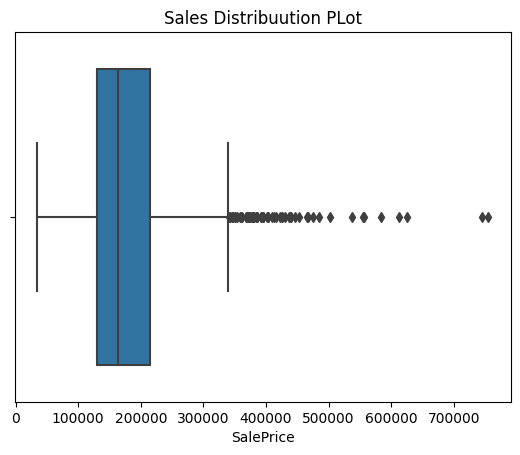

In [53]:
sns.boxplot(x=train_df['SalePrice'],data=train_df)
plt.title('Sales Distribuution PLot')
plt.show()

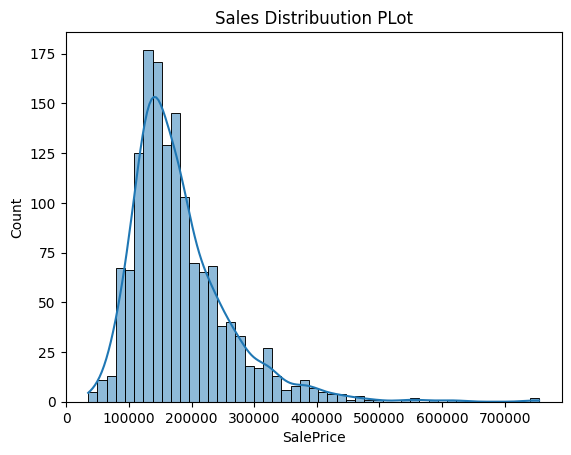

In [54]:
sns.histplot(x=train_df['SalePrice'],data=train_df,kde=True)
plt.title('Sales Distribuution PLot')
plt.show()

## Remove Outliers For Target Column

In [55]:
def remove_outliers(df,column):
    upper_limit = df[column].mean() + 2 * df[column].std()
    lower_limit = df[column].mean() - 2 * df[column].std()
    df.drop(df[(df[column] > upper_limit) | (df[column] < lower_limit)].index,inplace=True)

In [56]:
remove_outliers(train_df,'SalePrice')

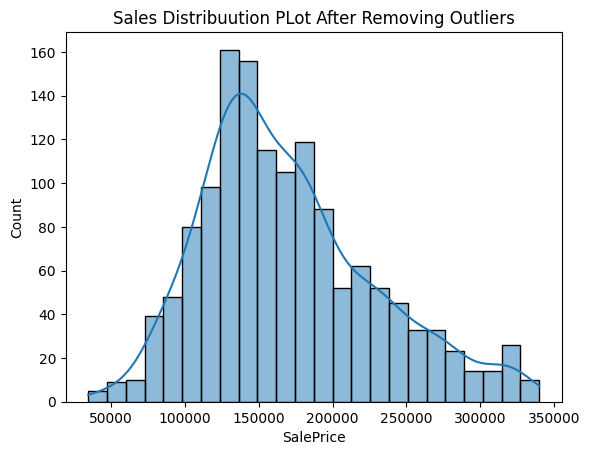

In [57]:
sns.histplot(x=train_df['SalePrice'],data=train_df,kde=True)
plt.title('Sales Distribuution PLot After Removing Outliers')
plt.show()

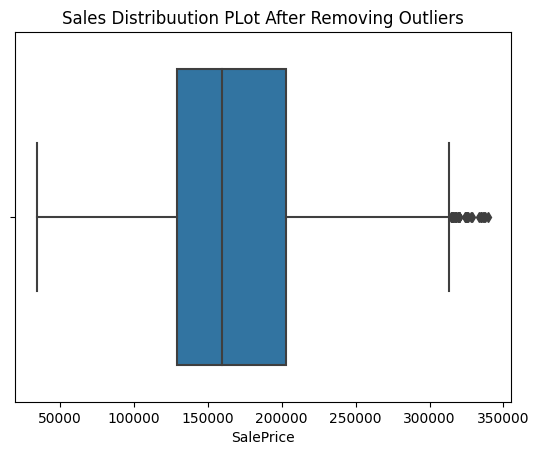

In [58]:
sns.boxplot(x=train_df['SalePrice'],data=train_df)
plt.title('Sales Distribuution PLot After Removing Outliers')
plt.show()

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1397 non-null   int64  
 1   MSZoning       1397 non-null   object 
 2   LotFrontage    1397 non-null   float64
 3   LotArea        1397 non-null   int64  
 4   Street         1397 non-null   object 
 5   LotShape       1397 non-null   object 
 6   LandContour    1397 non-null   object 
 7   Utilities      1397 non-null   object 
 8   LotConfig      1397 non-null   object 
 9   LandSlope      1397 non-null   object 
 10  Neighborhood   1397 non-null   object 
 11  Condition1     1397 non-null   object 
 12  Condition2     1397 non-null   object 
 13  BldgType       1397 non-null   object 
 14  HouseStyle     1397 non-null   object 
 15  OverallQual    1397 non-null   int64  
 16  OverallCond    1397 non-null   int64  
 17  YearBuilt      1397 non-null   int64  
 18  YearRemodAdd 

In [60]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

In [61]:
numeric_cols.shape

(37,)

## Plots for Columns Distribution

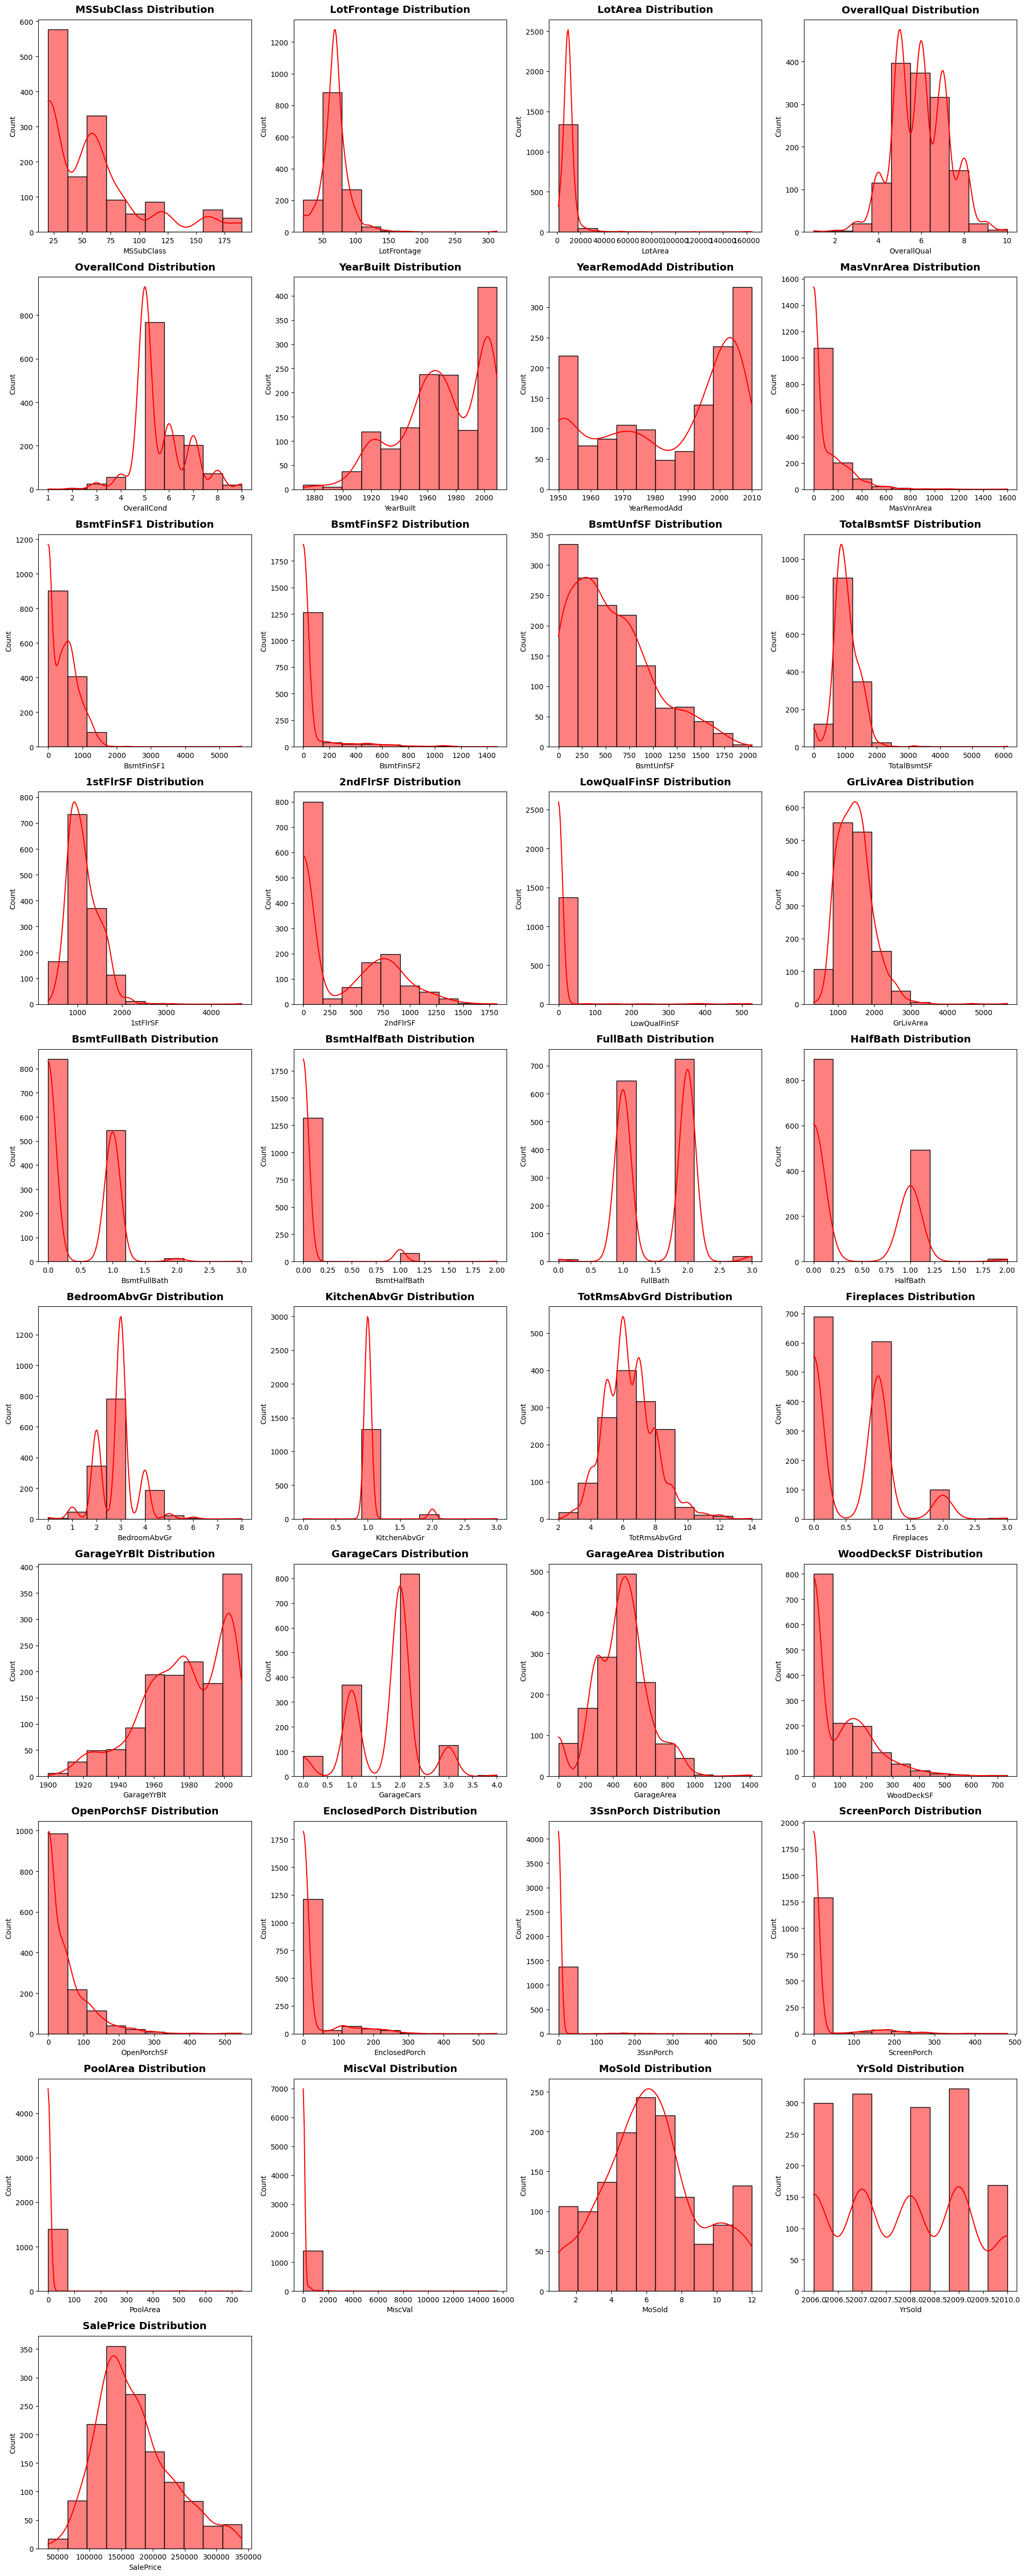

In [62]:
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)


plt.figure(figsize=(20, 5 * num_rows))

for index, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, index + 1)
    sns.histplot(train_df[col], bins=10, kde=True, color="red")
    plt.title(f"{col} Distribution", fontweight="bold", size=14, pad=10)

plt.tight_layout()
plt.show()

## BoxPlot for Columns Disribution

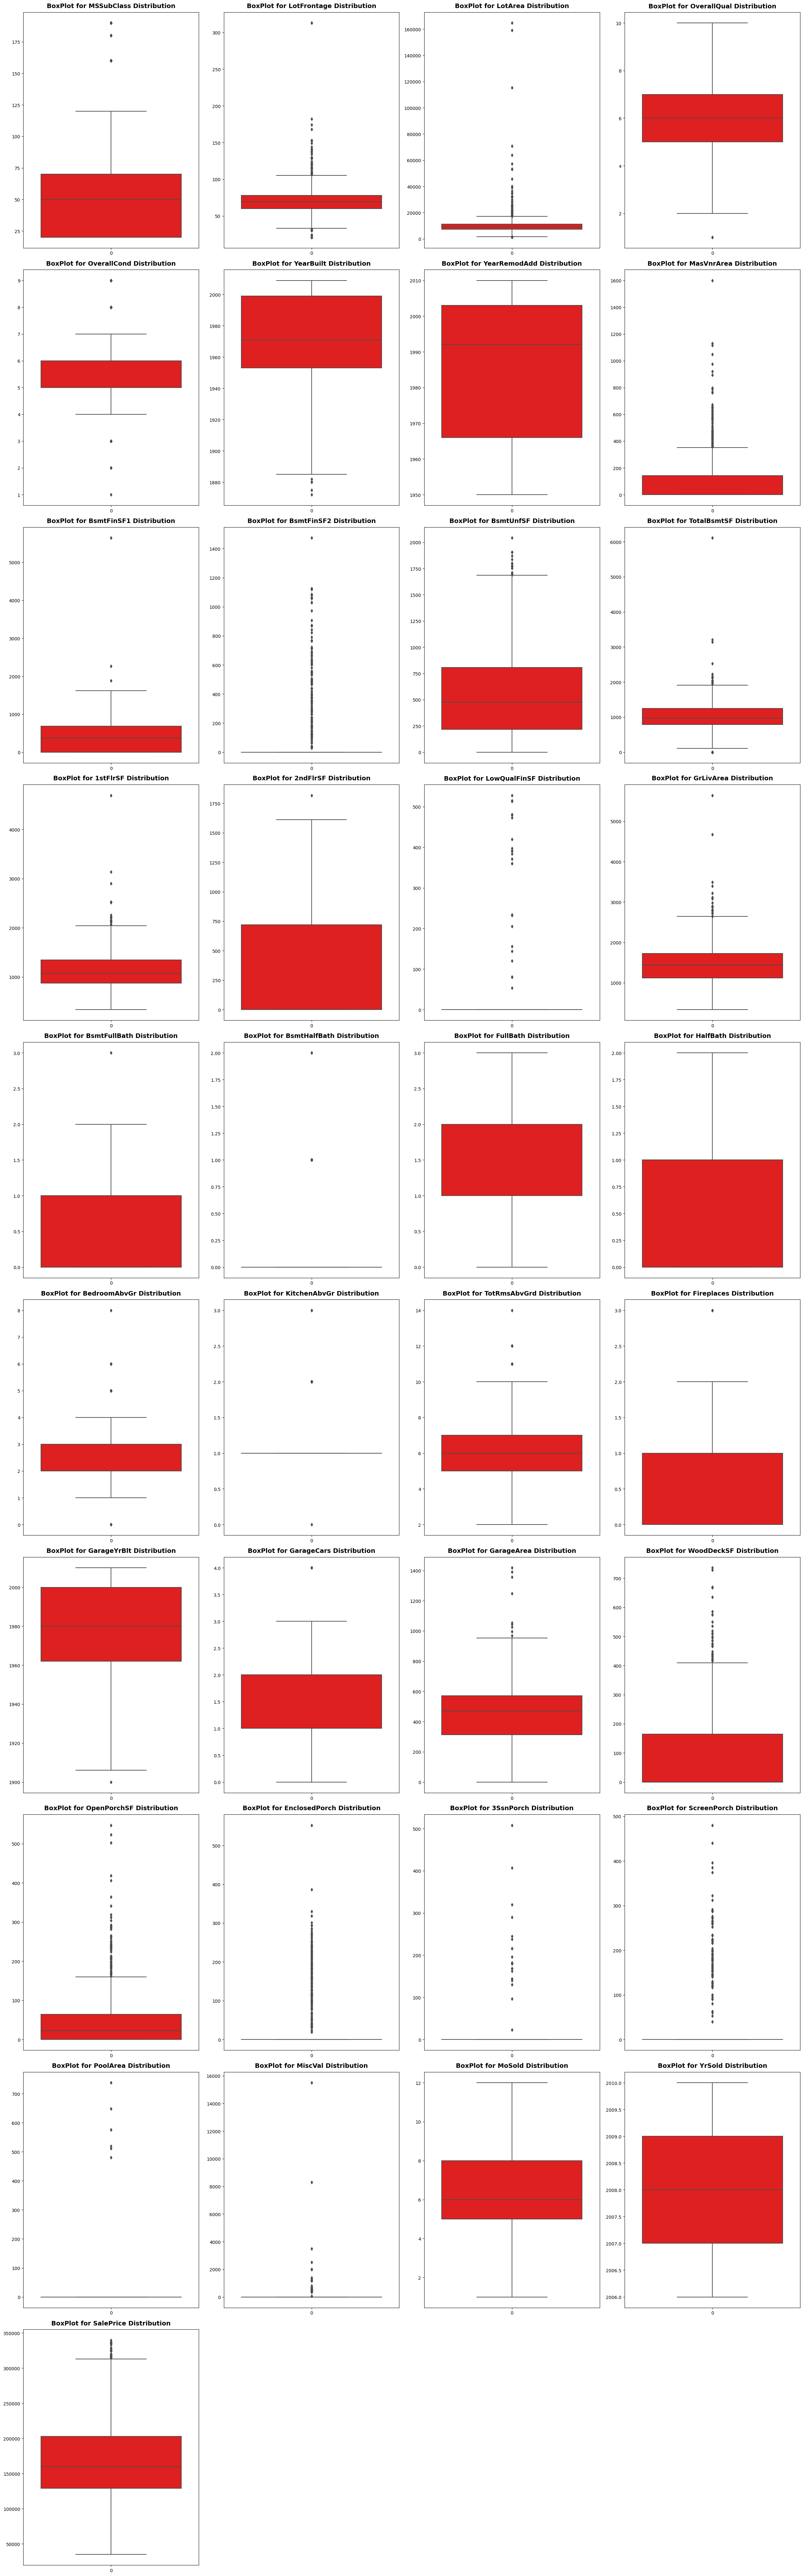

In [63]:
plt.figure(figsize=(25, 8 * num_rows))
for index, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, index + 1)
    sns.boxplot(train_df[col], color="red")
    plt.title(f"BoxPlot for {col} Distribution", fontweight="bold", size=14, pad=10)

plt.tight_layout()
plt.show()

## Removing Outliers For Sum Columns

In [64]:
remove_outliers(train_df,'MSSubClass')
remove_outliers(train_df,'LotFrontage')
remove_outliers(train_df,'LotArea')
remove_outliers(train_df,'OverallCond')
remove_outliers(train_df,'MasVnrArea')
remove_outliers(train_df,'BsmtFinSF2')
remove_outliers(train_df,'BsmtUnfSF')
remove_outliers(train_df,'TotalBsmtSF')
remove_outliers(train_df,'1stFlrSF')
remove_outliers(train_df,'LowQualFinSF')
remove_outliers(train_df,'GrLivArea')
remove_outliers(train_df,'WoodDeckSF')
remove_outliers(train_df,'OpenPorchSF')
remove_outliers(train_df,'EnclosedPorch')
remove_outliers(train_df,'3SsnPorch')
remove_outliers(train_df,'ScreenPorch')
remove_outliers(train_df,'PoolArea')
remove_outliers(train_df,'MiscVal')
remove_outliers(train_df,'PoolArea')

## BoxPlot After Removing Outliers

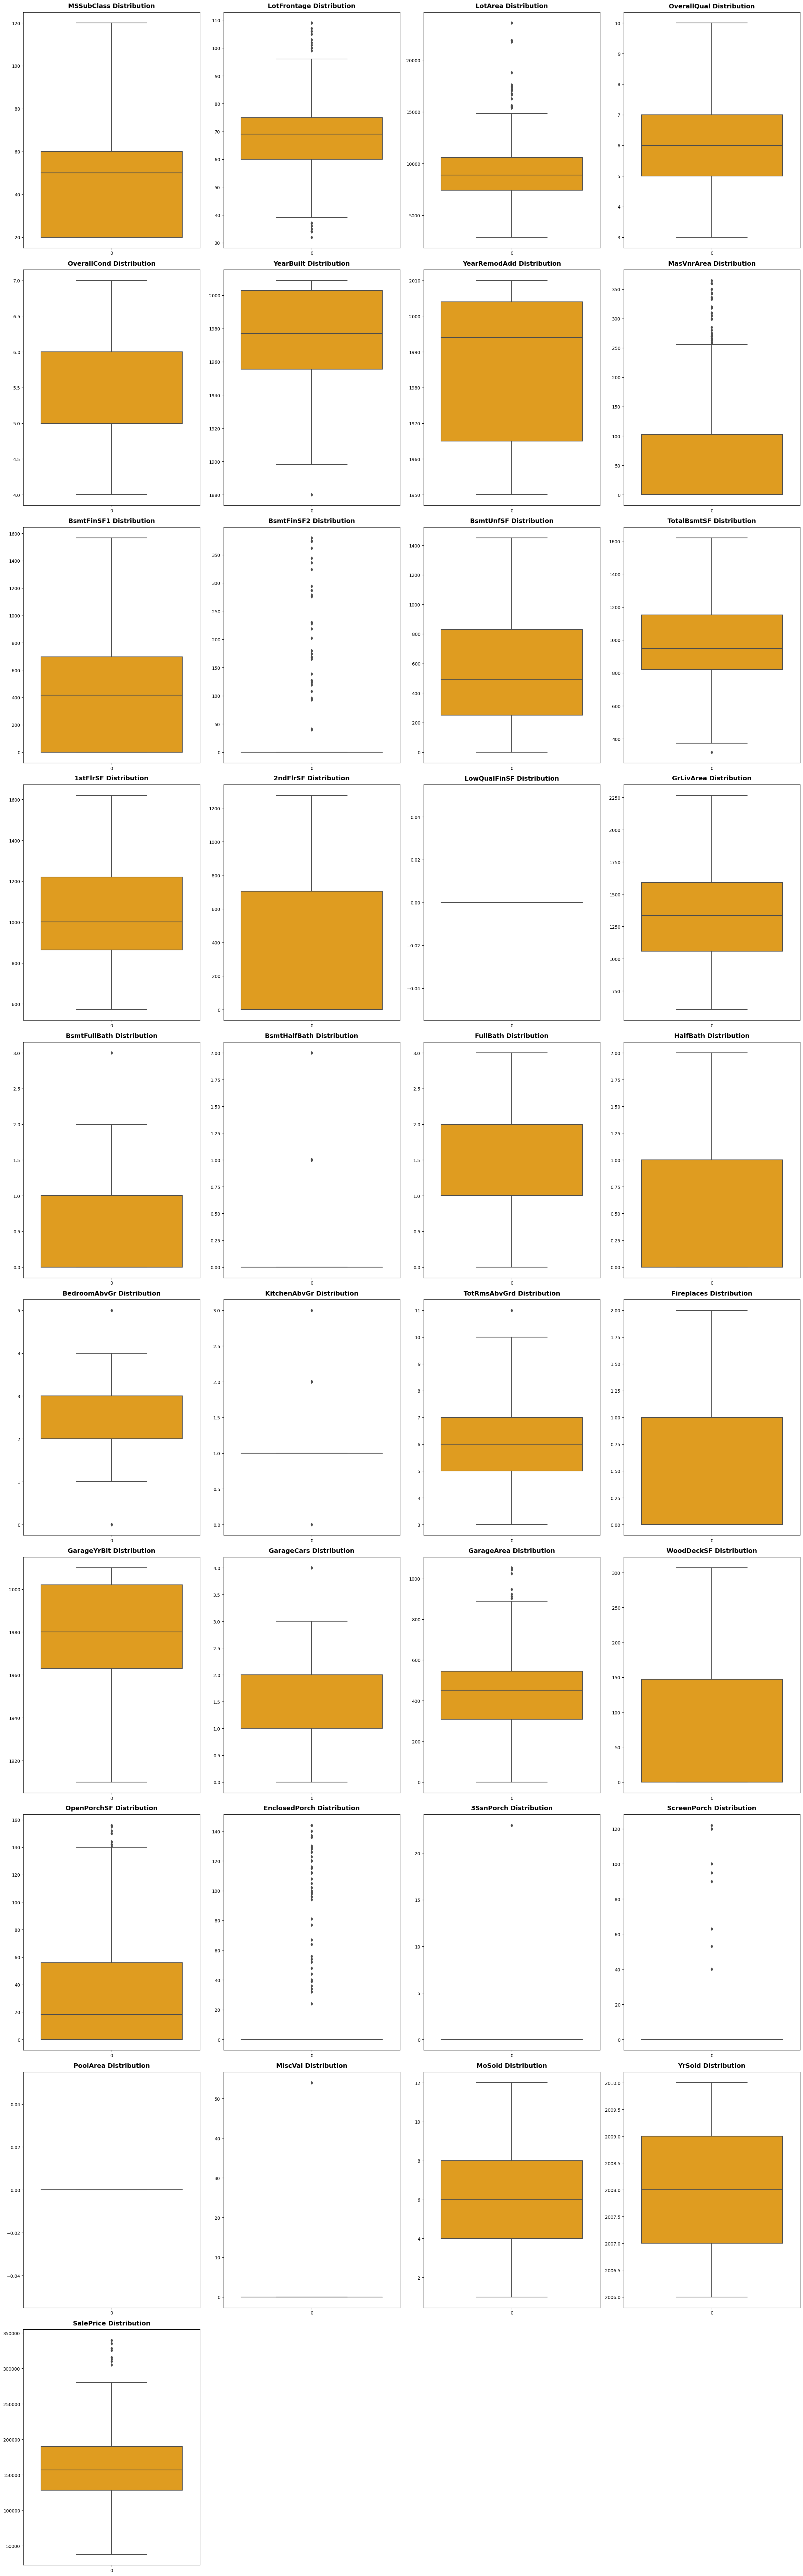

In [65]:
plt.figure(figsize=(25, 8 * num_rows))
for index, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, index + 1)
    sns.boxplot(train_df[col], color="orange")
    plt.title(f"{col} Distribution", fontweight="bold", size=14, pad=10)

plt.tight_layout()
plt.show()

## HistPlot for Columns After Removing Outliers

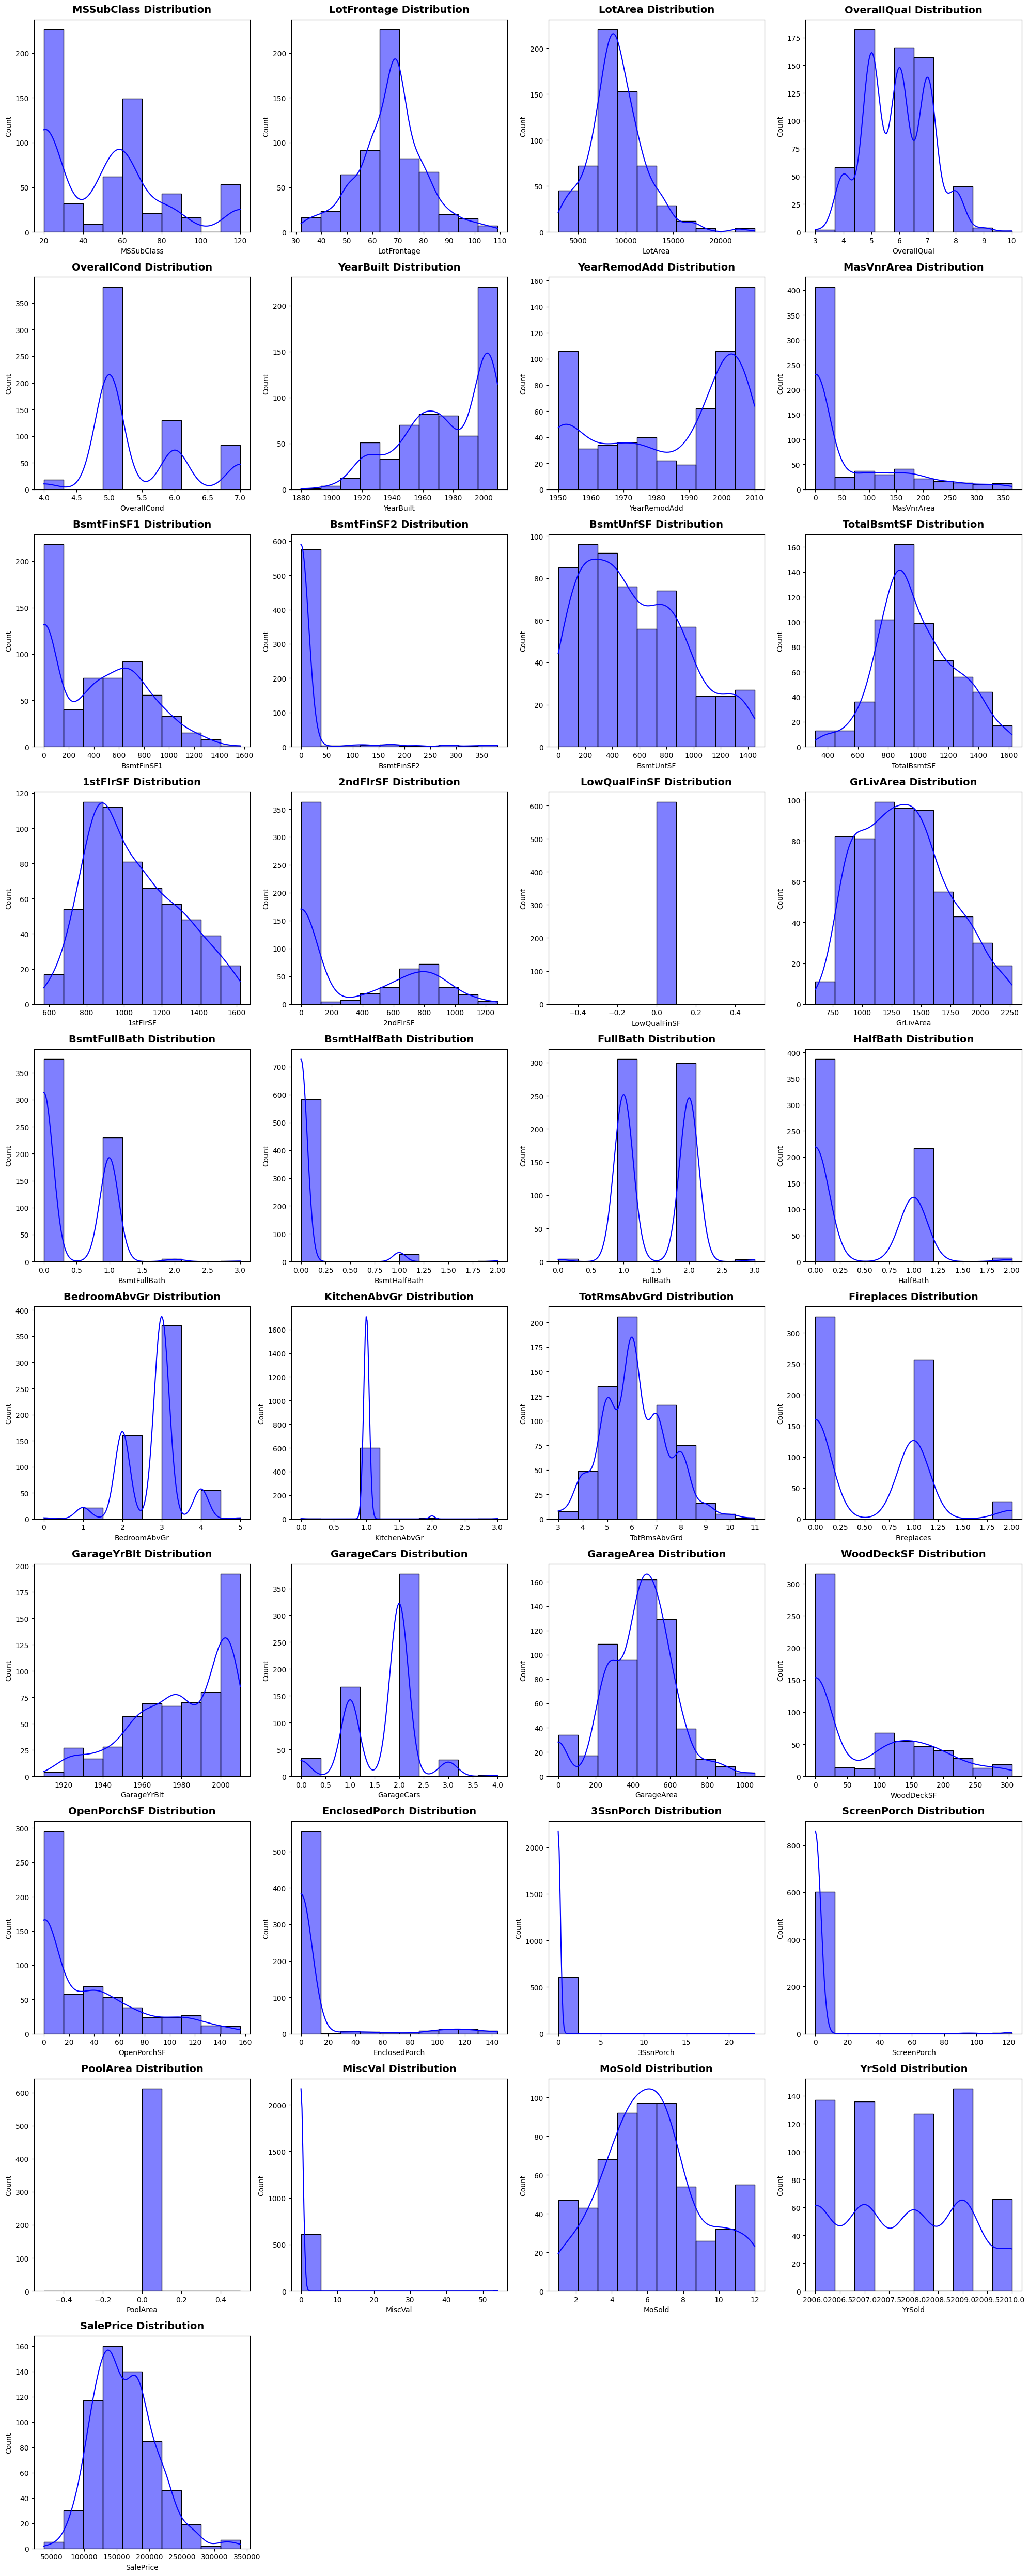

In [66]:
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)


plt.figure(figsize=(20, 5 * num_rows))

for index, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, index + 1)
    sns.histplot(train_df[col], bins=10, kde=True, color="blue")
    plt.title(f"{col} Distribution", fontweight="bold", size=14, pad=10)

plt.tight_layout()
plt.show()

In [67]:
cat_col = train_df.select_dtypes(include='object').columns

## plot_boxplots_for_categorical_columns

In [68]:
def plot_boxplots_for_categorical_columns(cat_columns):
    
    plt.figure(figsize=(20, 15))
    
    
    for index, column in enumerate(cat_columns):
        plt.subplot(5, 3, index + 1)  # Create subplot
        sns.boxplot(x=column, y='SalePrice', data=train_df)
        plt.title(f"{column} vs SalePrice", fontweight="black")
        plt.xticks(rotation=90)  # Rotate x-ticks if necessary
    
    
    plt.tight_layout()
    plt.show()


In [69]:
cat_col.shape

(37,)

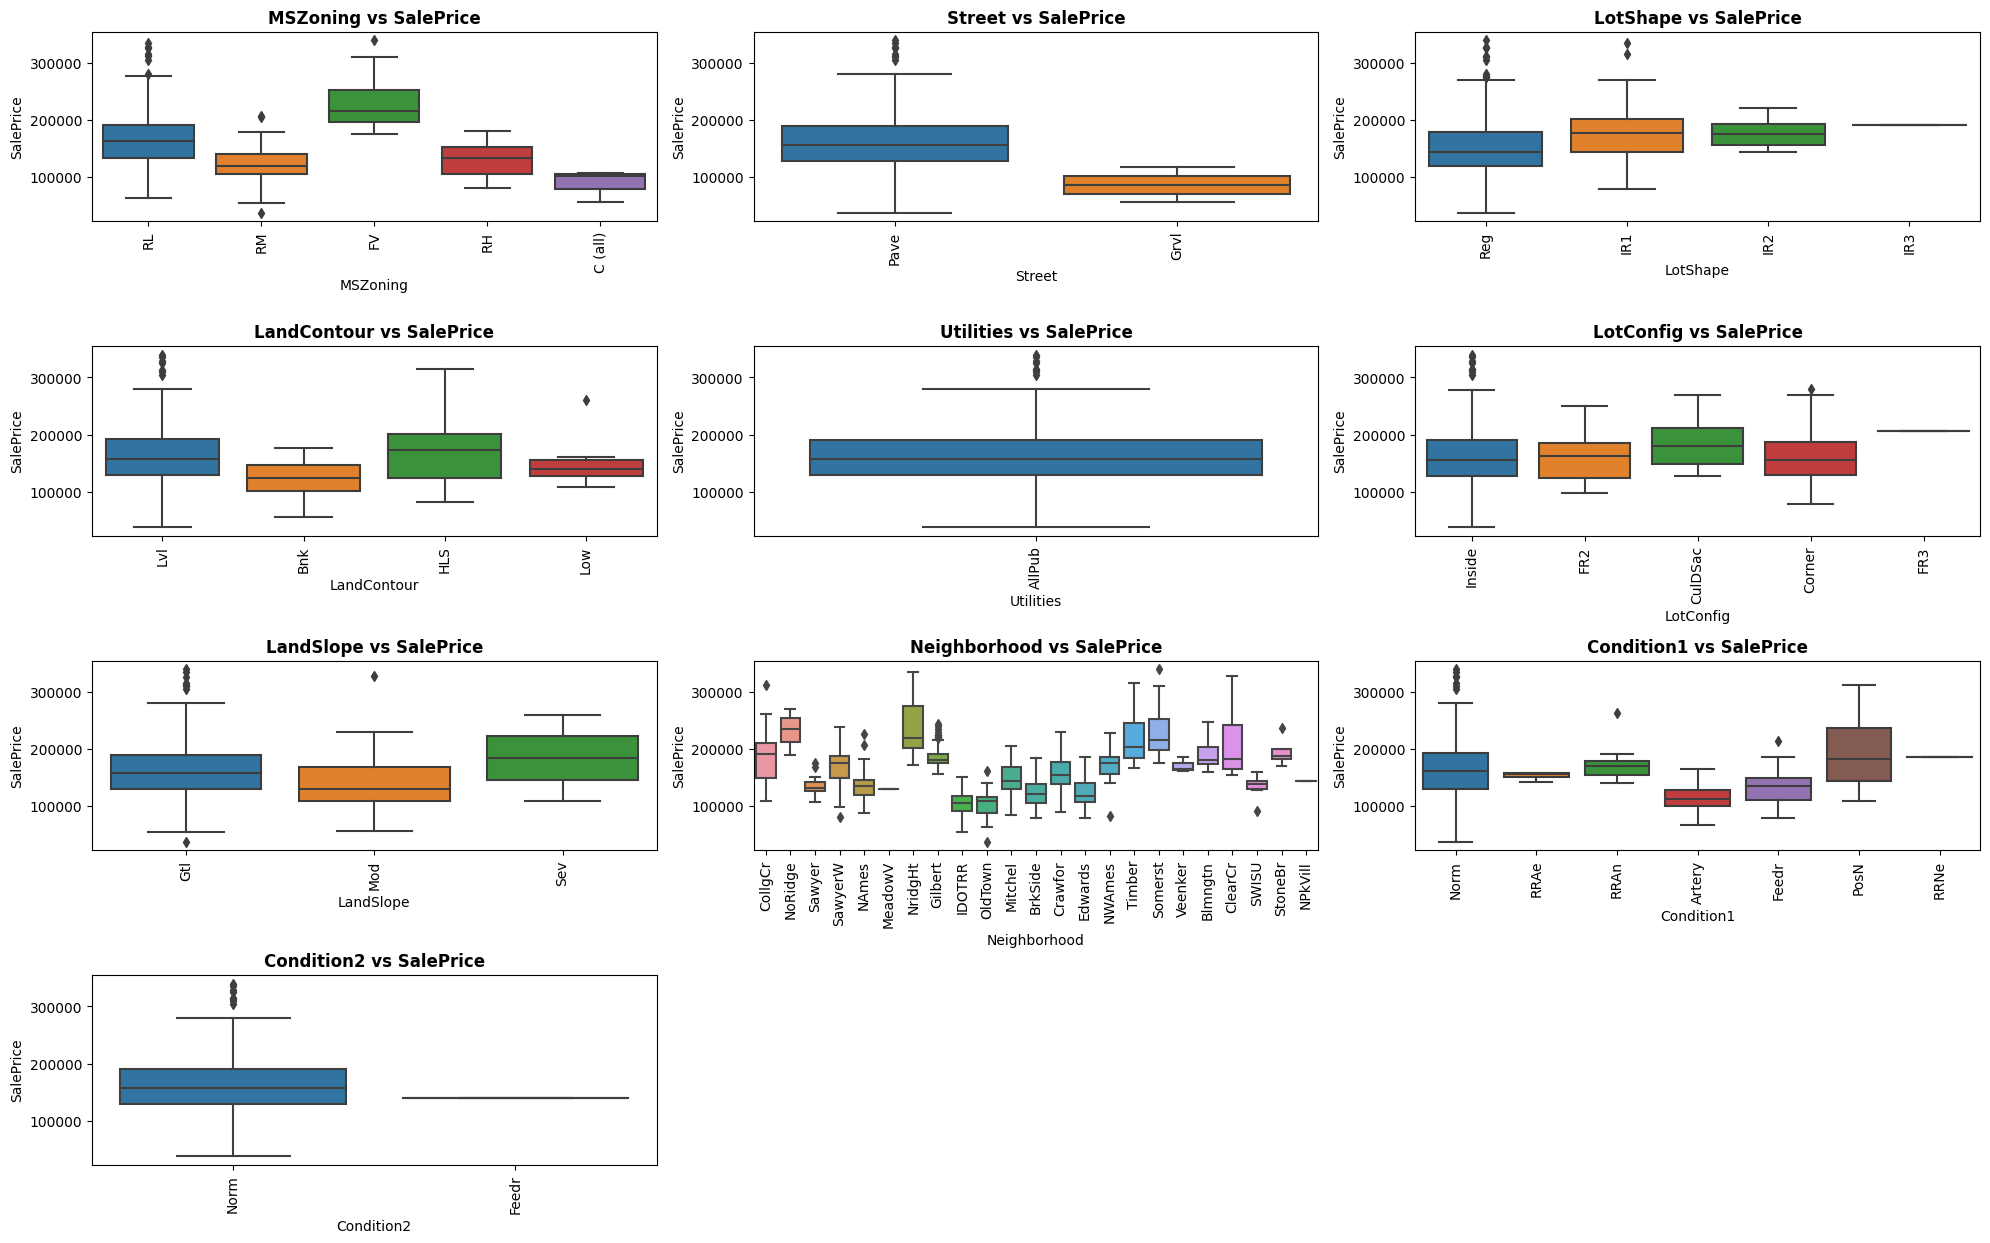

In [70]:
plot_boxplots_for_categorical_columns(cat_col[0:10])

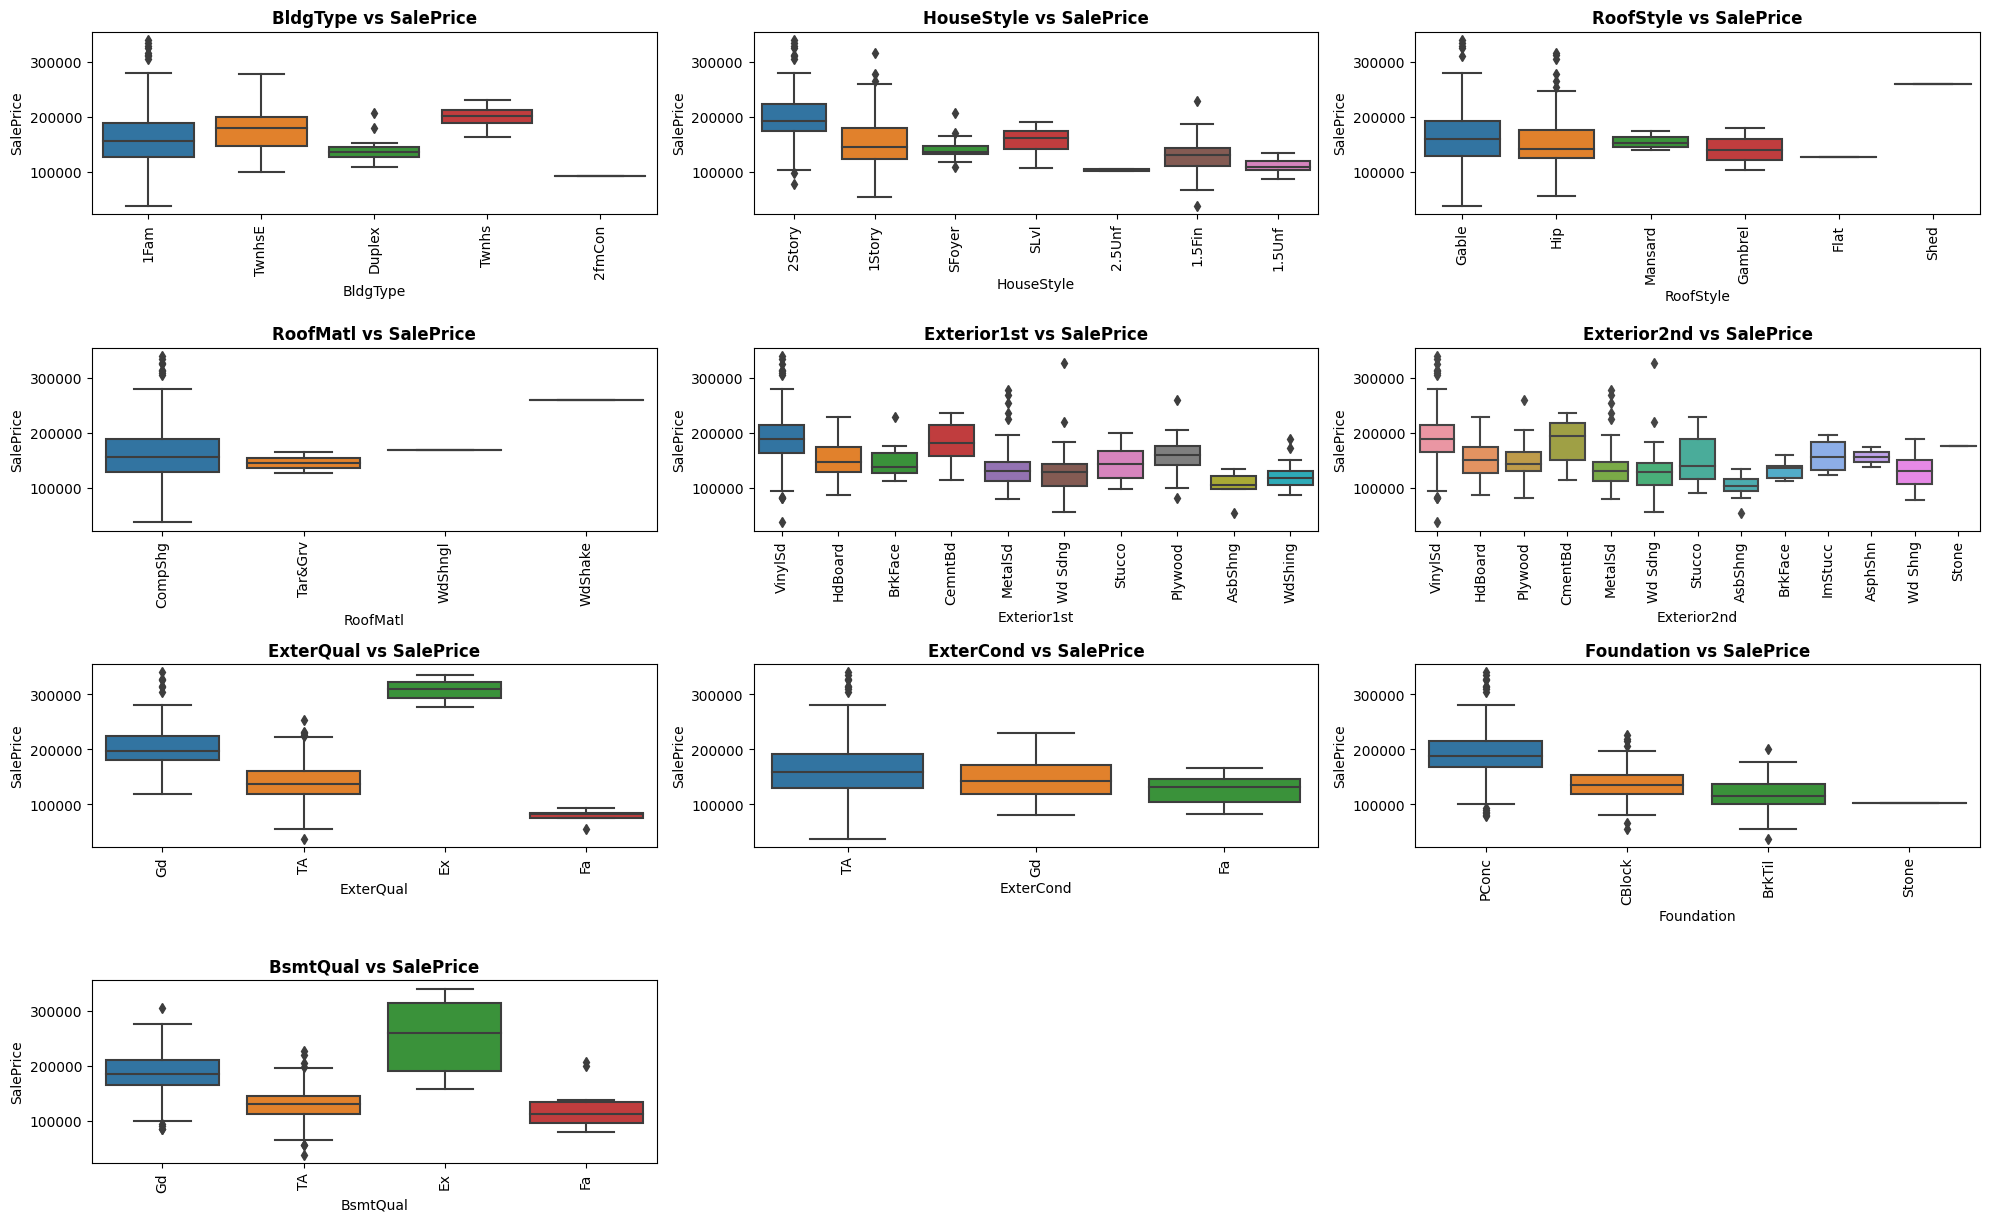

In [71]:
plot_boxplots_for_categorical_columns(cat_col[10:20])

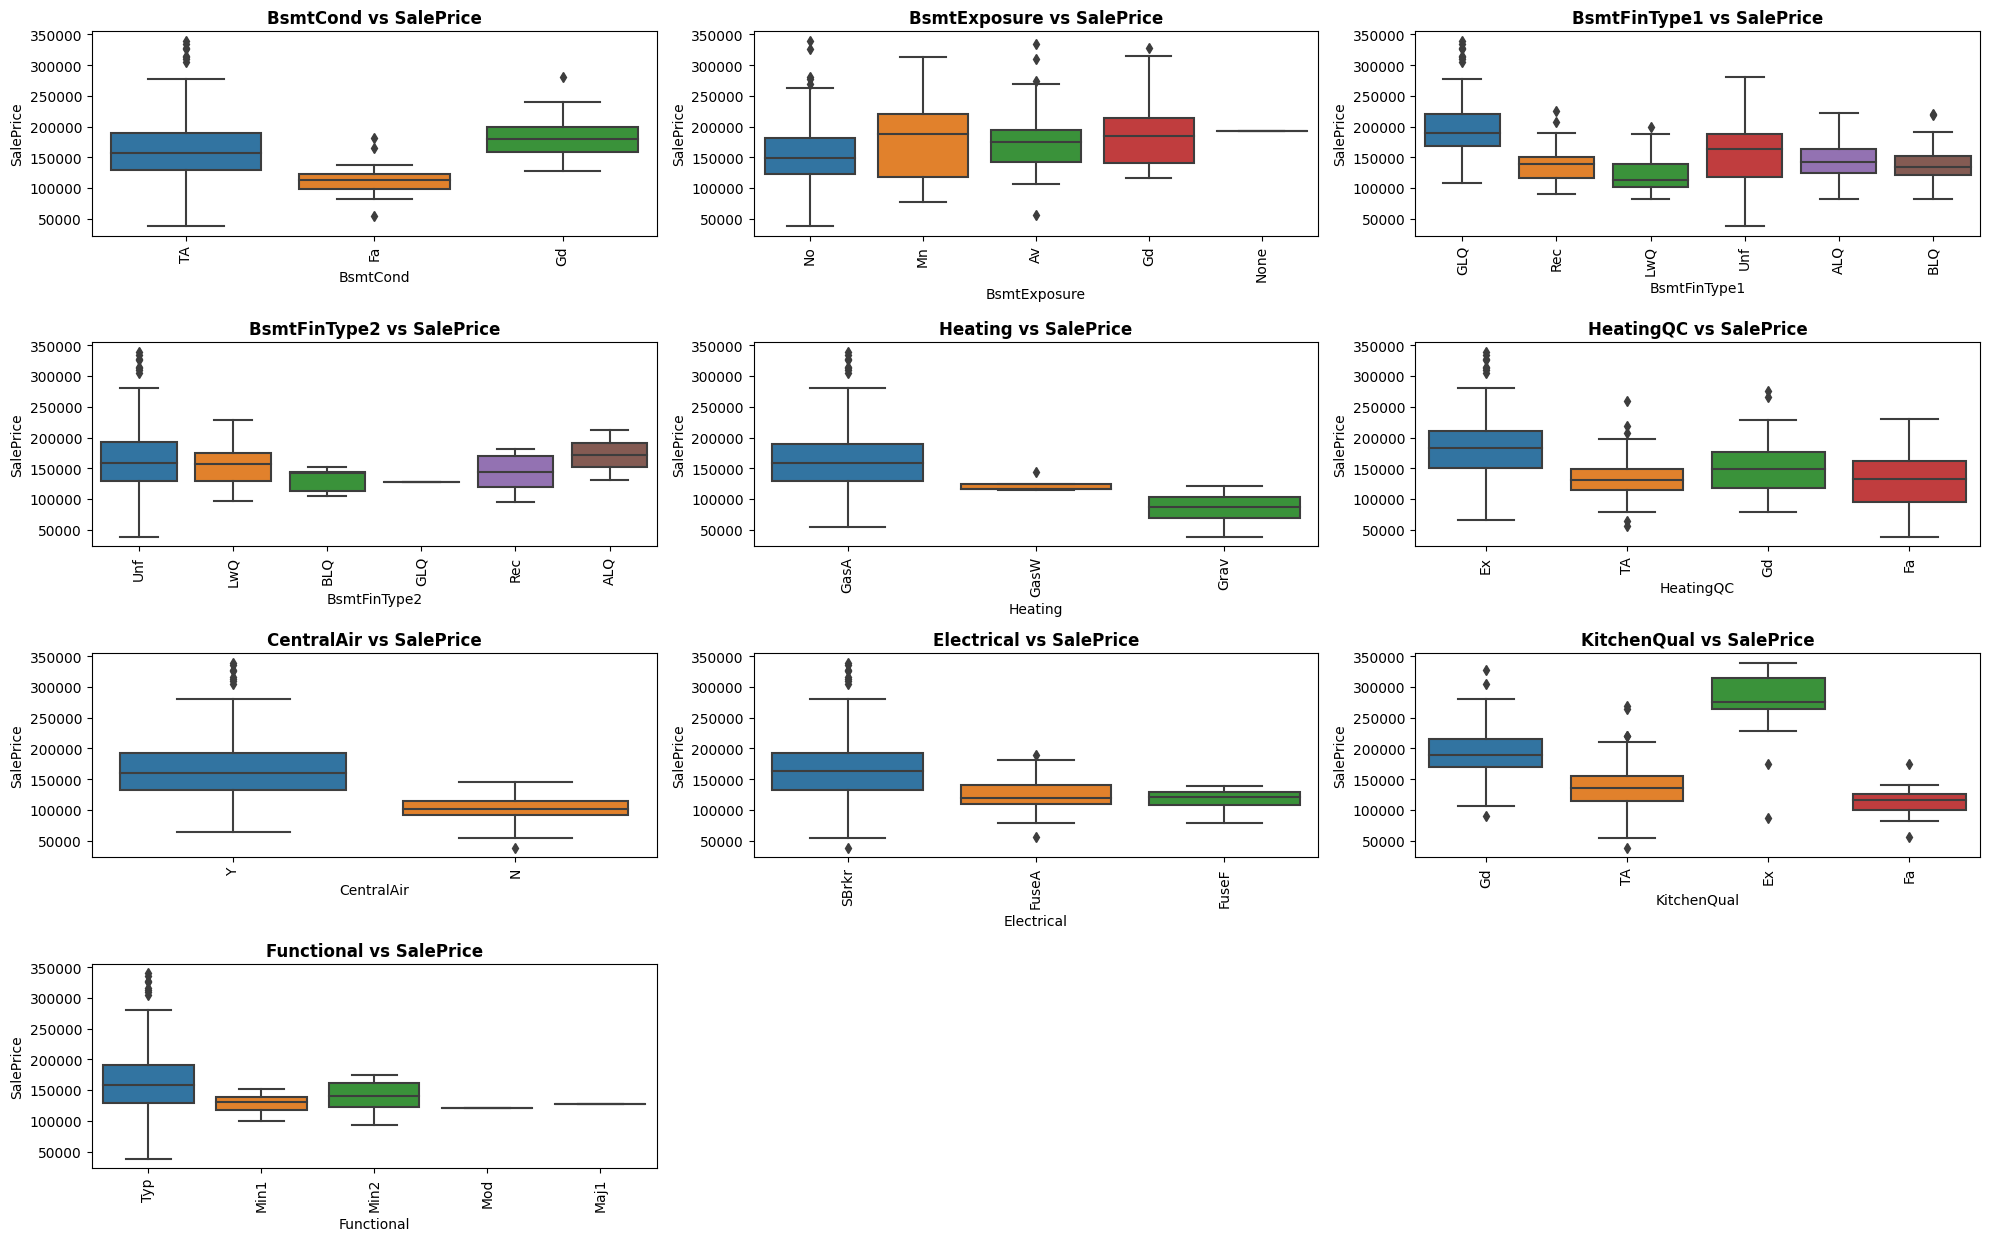

In [72]:
plot_boxplots_for_categorical_columns(cat_col[20:30])

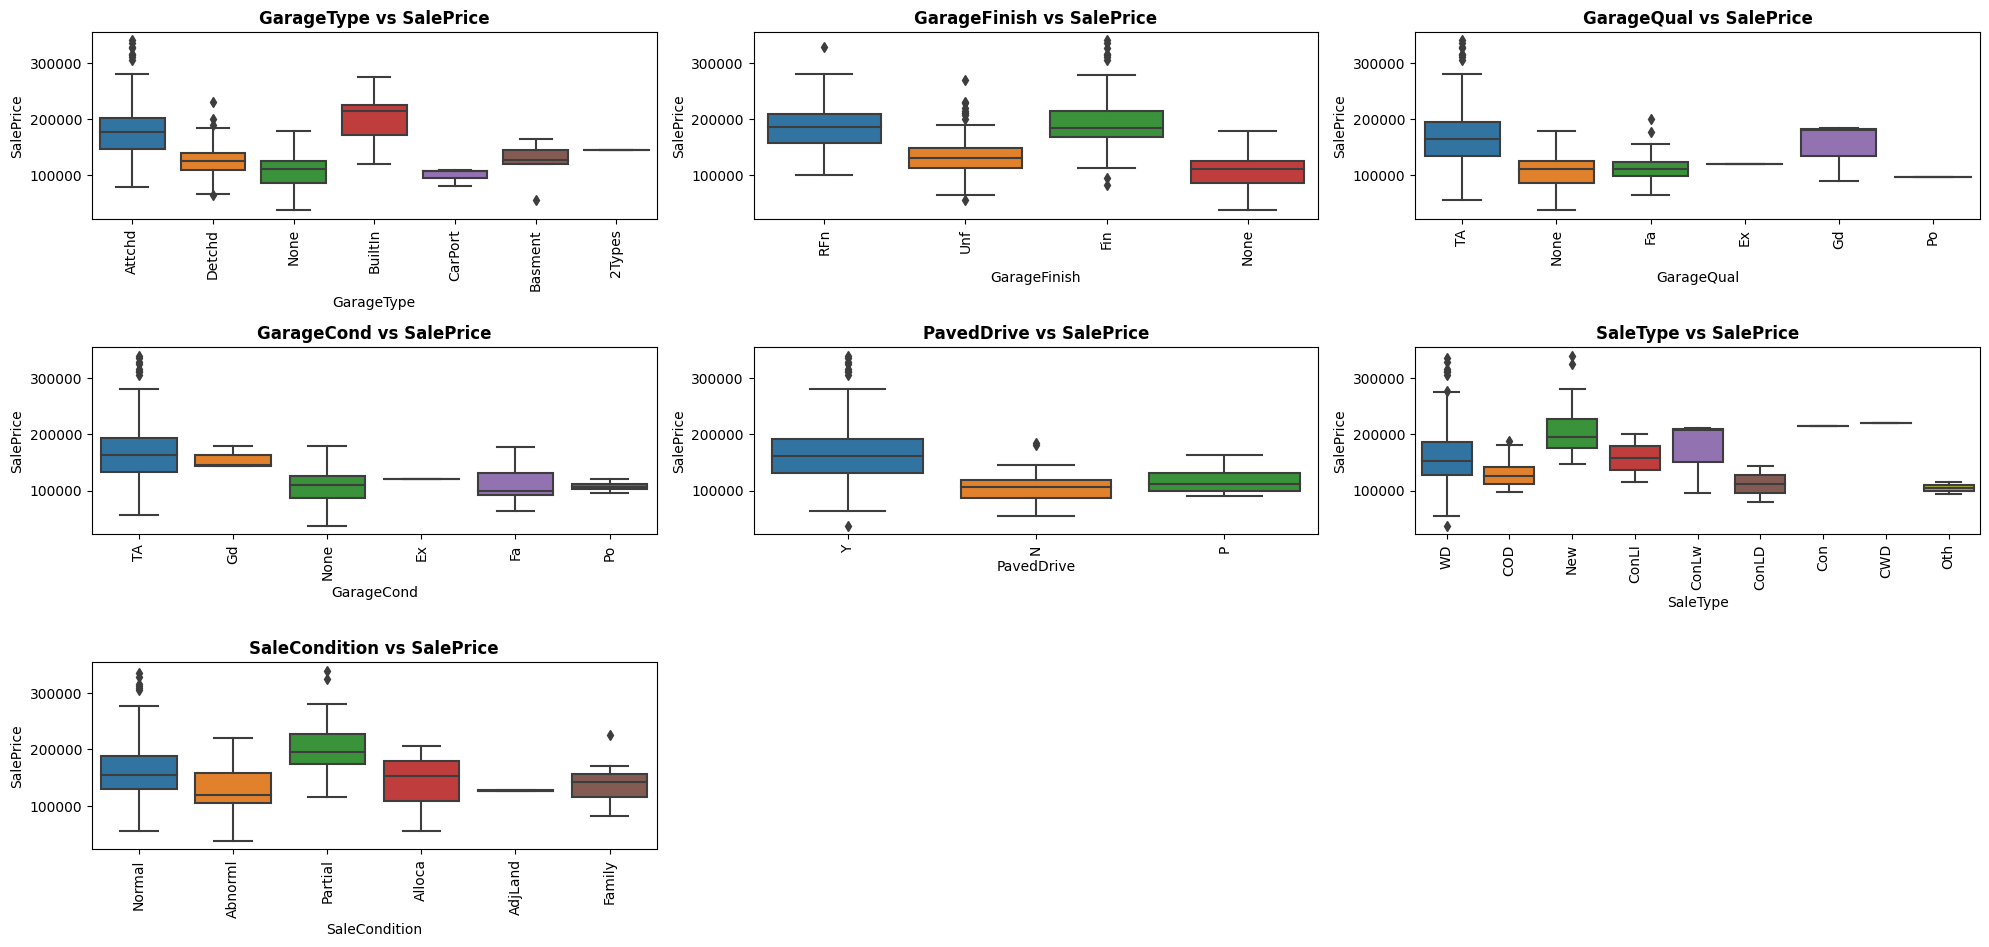

In [73]:
plot_boxplots_for_categorical_columns(cat_col[30:])

## HeatMap Correlation

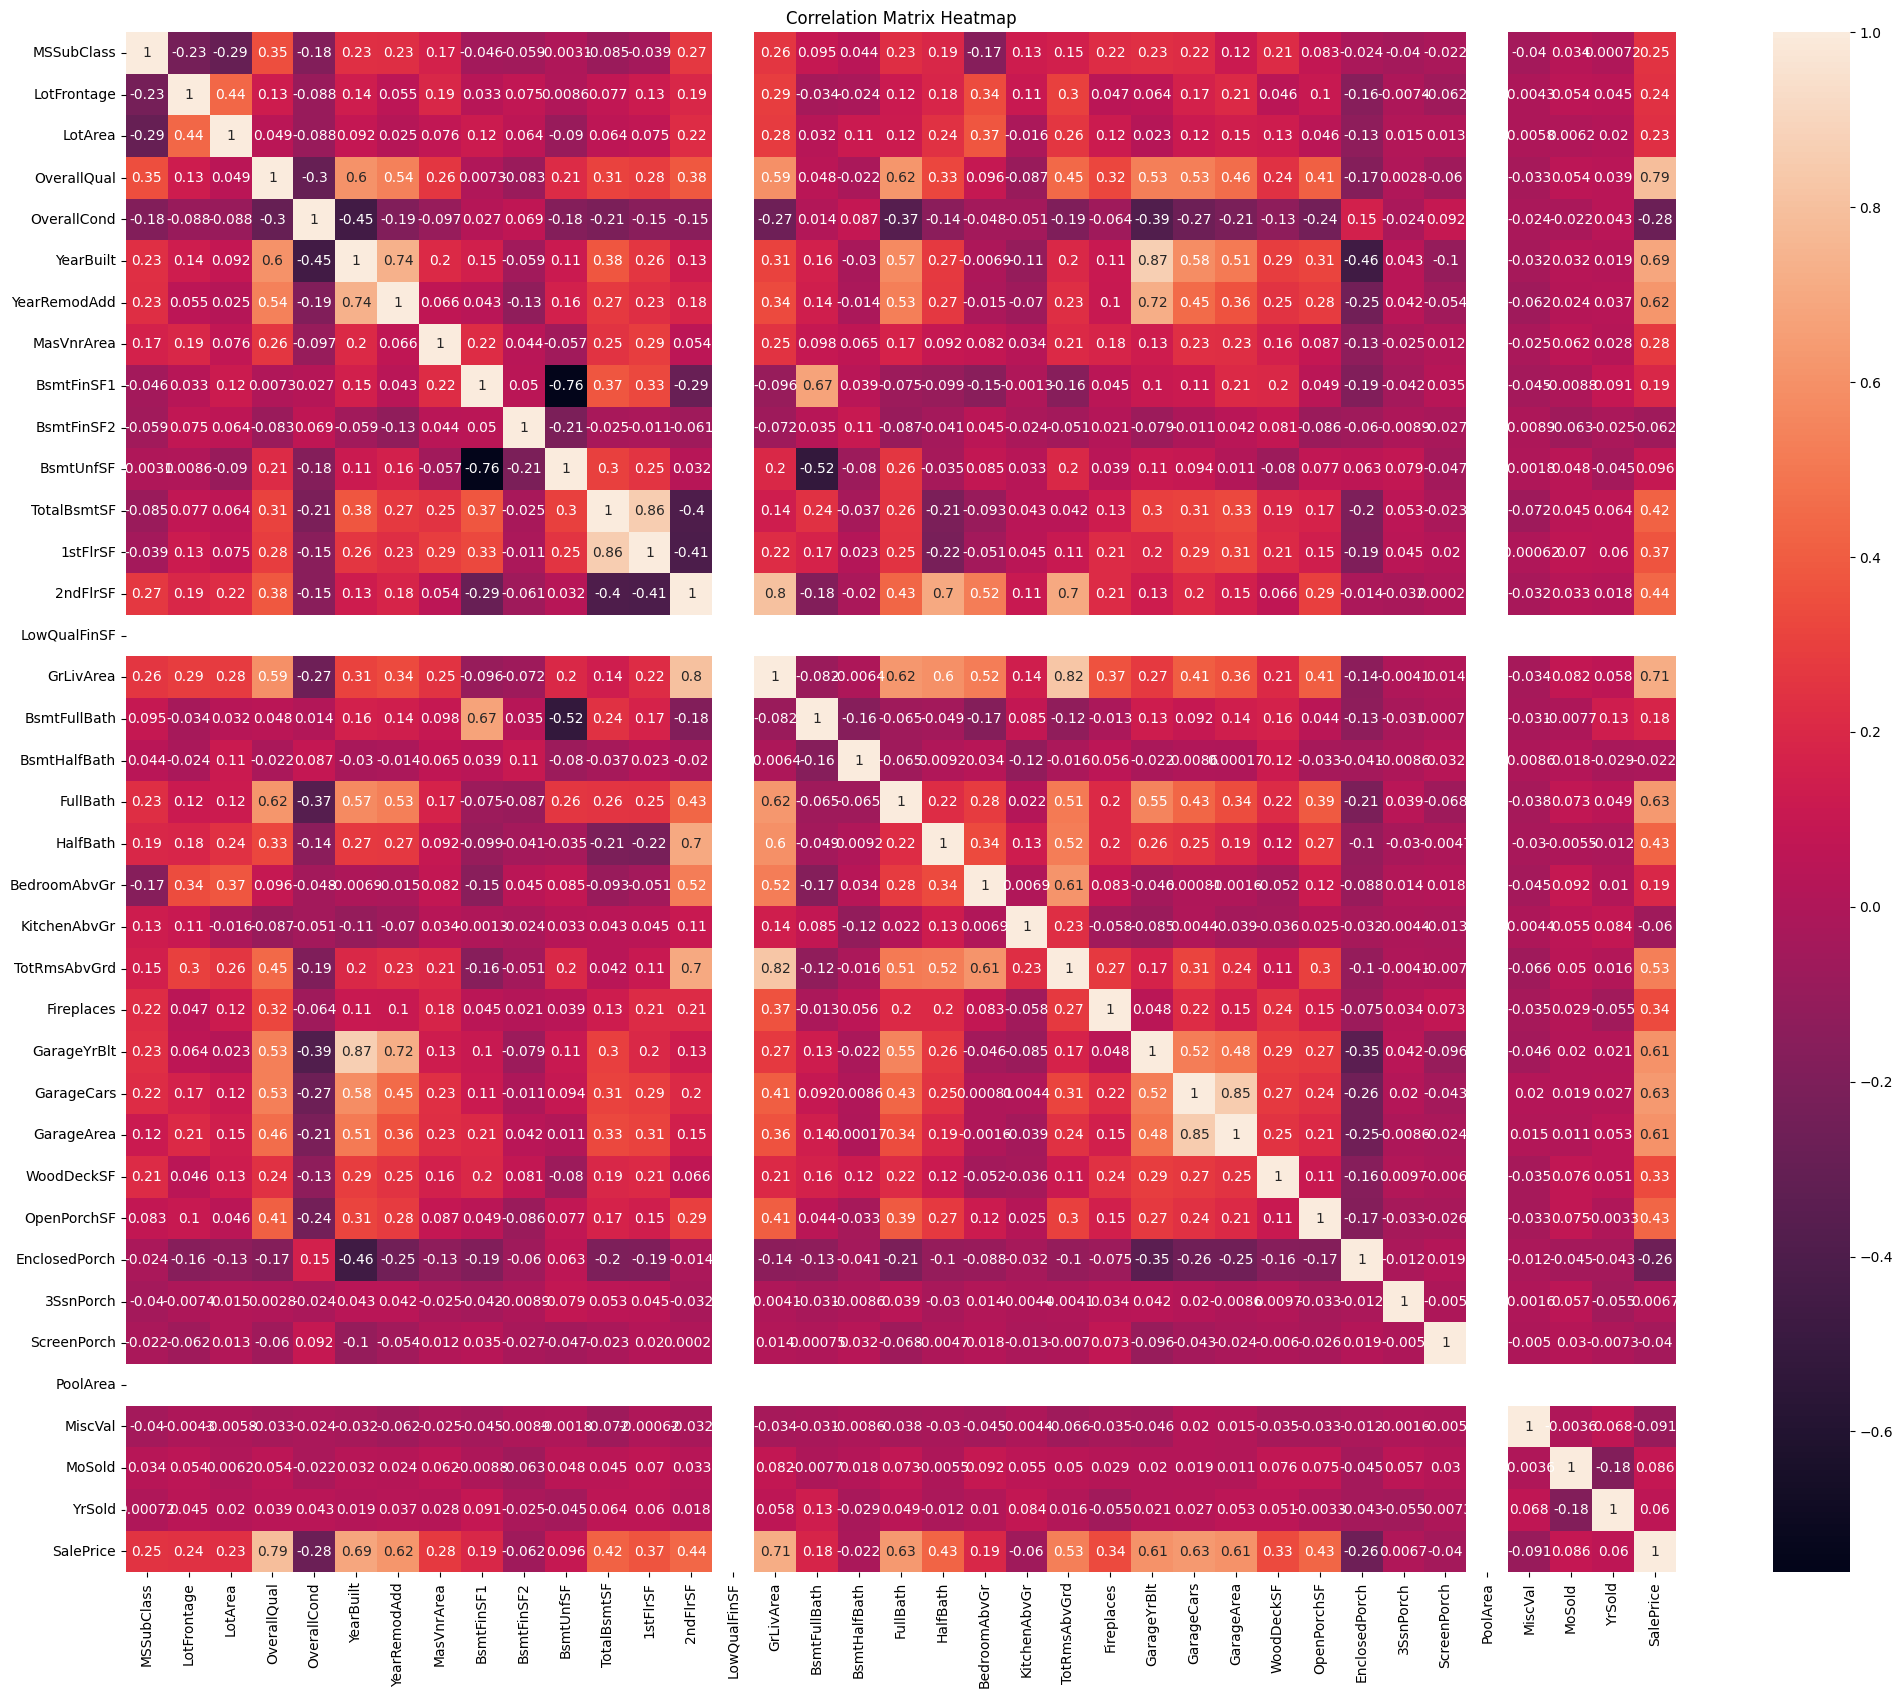

In [74]:
plt.figure(figsize=(25, 20))
sns.heatmap(train_df.select_dtypes(include=[int,float]).corr(),annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Drop Unnecessary Column

In [75]:
# Delete this column as it is class imbalance 
train_df.drop(columns='Utilities',inplace=True)
test_df.drop(columns='Utilities',inplace=True)

In [76]:
train_df.shape,test_df.shape

((611, 73), (1459, 72))

# Feature Engineering

In [77]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
  

In [78]:
train_df[['YearBuilt','YrSold']]

YearBuilt  YrSold
0          2003    2008
2          2001    2008
4          2000    2008
10         1965    2008
18         2004    2008
...         ...     ...
1448       1910    2007
1450       1974    2009
1453       2006    2006
1454       2004    2009
1455       1999    2007

[611 rows x 2 columns]

## Create New Column Called Year_At_Sale

In [79]:
train_df['Year_At_Sale'] = train_df['YrSold'] - train_df['YearBuilt']

In [80]:
test_df['Year_At_Sale'] = test_df['YrSold'] - test_df['YearBuilt']

In [81]:
train_df[['Year_At_Sale']]

Year_At_Sale
0                5
2                7
4                8
10              43
18               4
...            ...
1448            97
1450            35
1453             0
1454             5
1455             8

[611 rows x 1 columns]

## Drop Columns

In [82]:
train_df.drop(columns=['YrSold','YearBuilt'],inplace=True)
test_df.drop(columns=['YrSold','YearBuilt'],inplace=True)

In [83]:
train_df.shape,test_df.shape

((611, 72), (1459, 71))

In [84]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenP

In [85]:
train_df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']]

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF
0            706           0        150          856       856       854
2            486           0        434          920       920       866
4            655           0        490         1145      1145      1053
10           906           0        134         1040      1040         0
18           646           0        468         1114      1114         0
...          ...         ...        ...          ...       ...       ...
1448           0           0        560          560       796       550
1450           0           0        896          896       896       896
1453           0           0       1140         1140      1140         0
1454         410           0        811         1221      1221         0
1455           0           0        953          953       953       694

[611 rows x 6 columns]

## Create Total_Square_Feet Column

In [86]:
train_df['Total_Square_Feet'] = train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] + train_df['BsmtUnfSF'] + train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [87]:
test_df['Total_Square_Feet'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] + test_df['BsmtUnfSF'] + test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

In [88]:
bsm_col = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','Total_Square_Feet']

In [89]:
train_df.shape,test_df.shape

((611, 73), (1459, 72))

## RegPlot for bsm_col

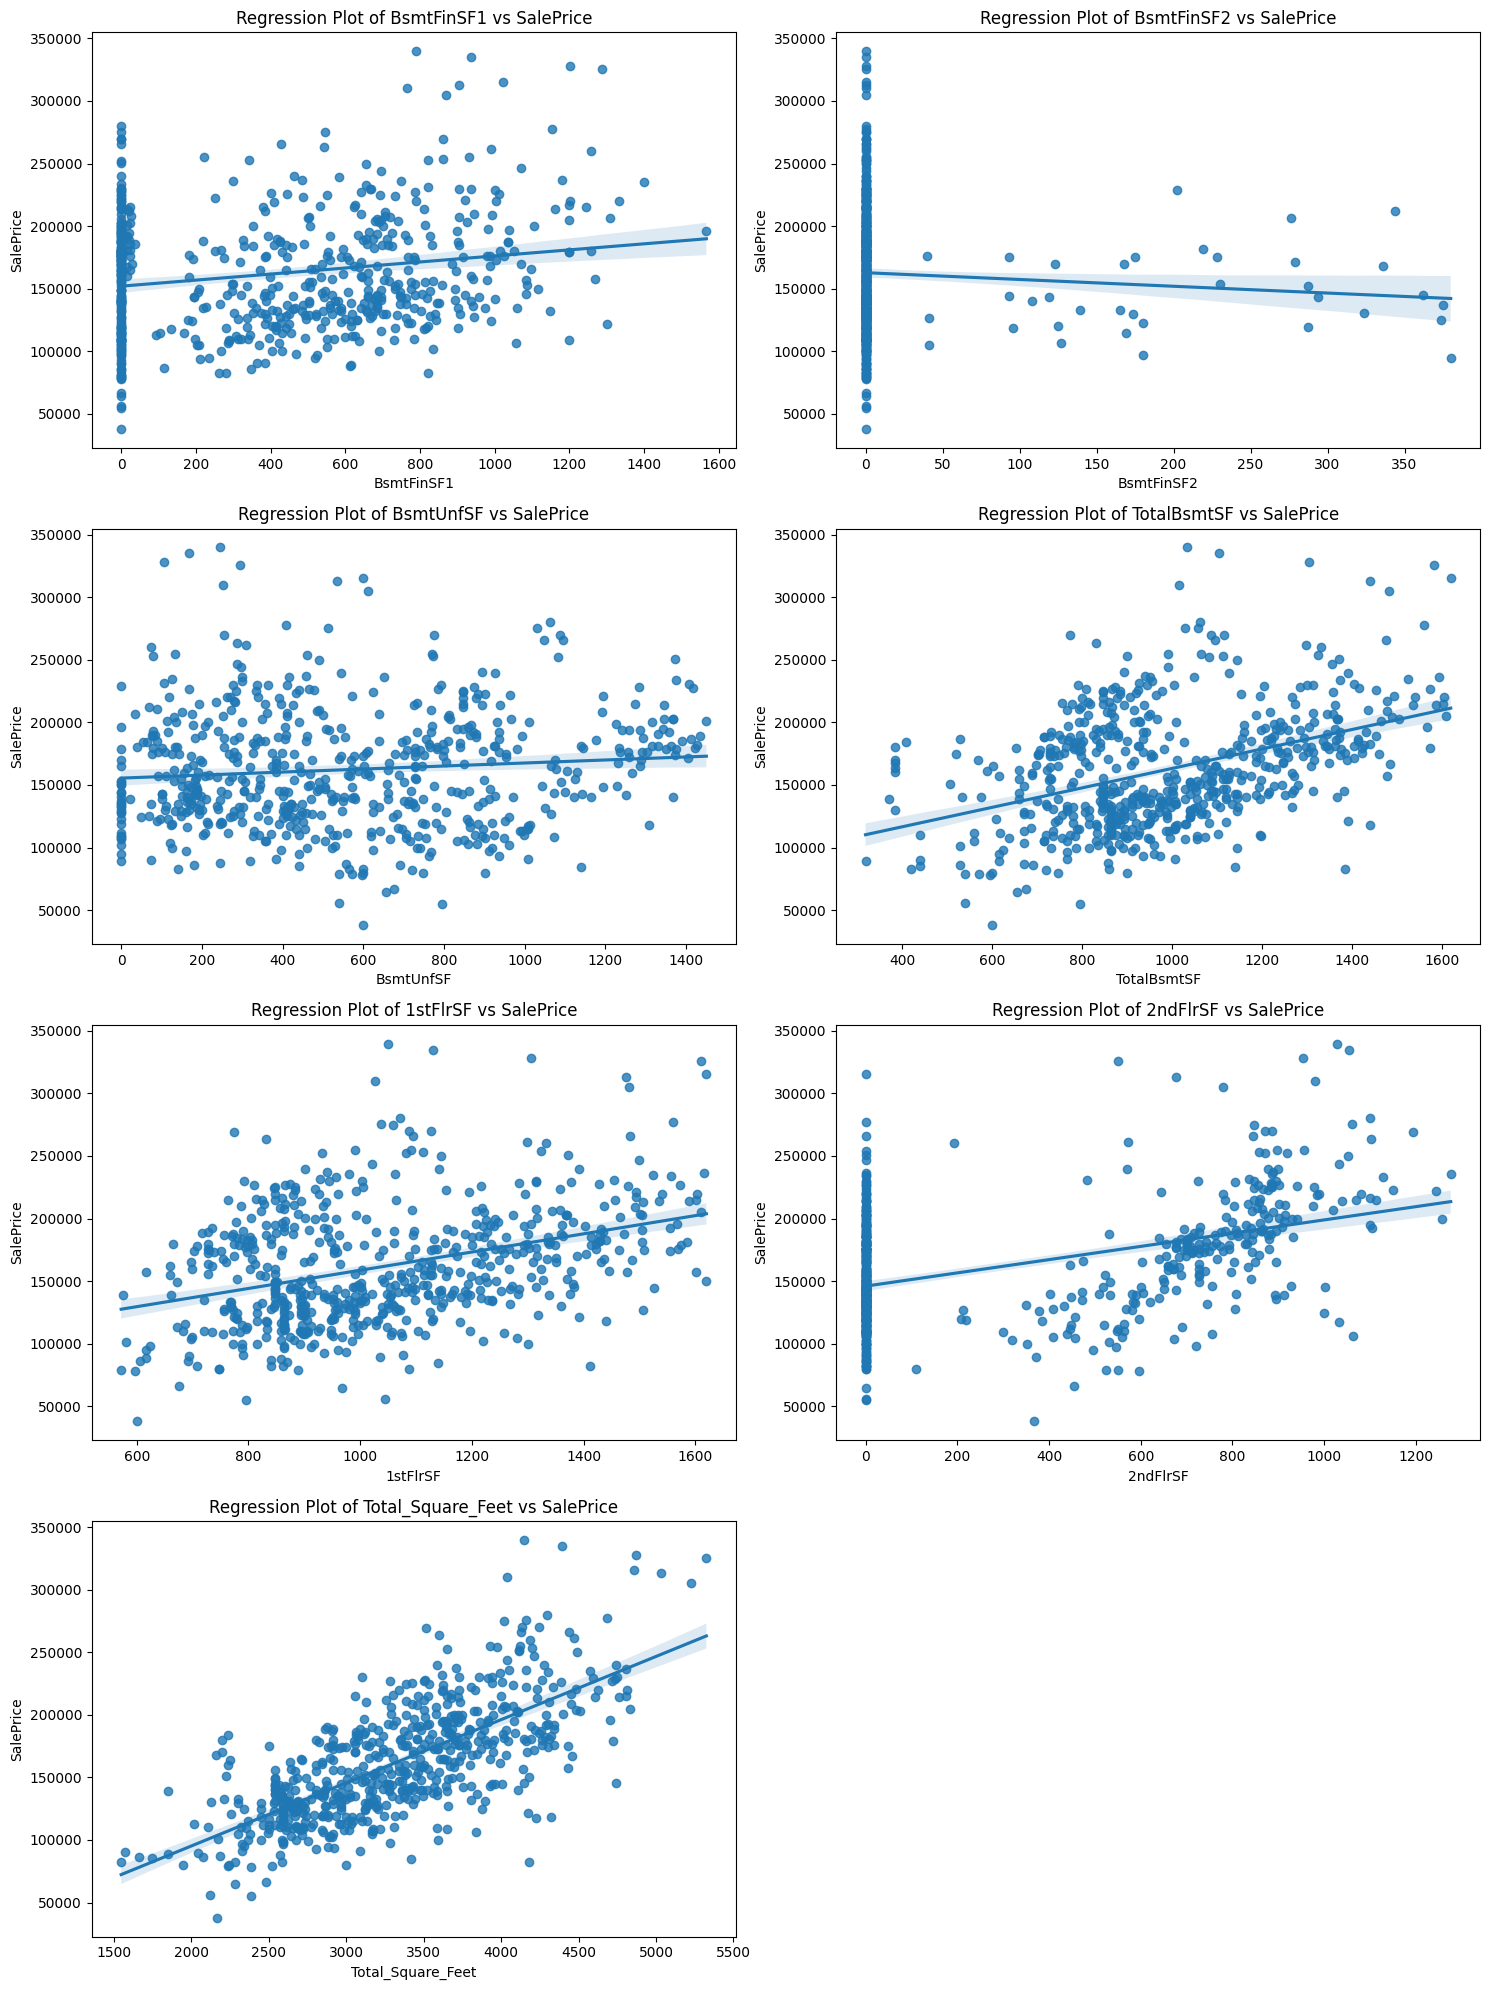

In [90]:

import math
num_plots = len(bsm_col)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))


if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  


for i, column in enumerate(bsm_col):
    sns.regplot(x=column, y='SalePrice', data=train_df, ax=axes[i])
    axes[i].set_title(f'Regression Plot of {column} vs SalePrice')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Drop Columns With Weak Correlation

In [91]:
train_df.drop(columns=['BsmtFinSF2','BsmtUnfSF'],inplace=True)
test_df.drop(columns=['BsmtFinSF2','BsmtUnfSF'],inplace=True)

In [92]:
train_df.shape,test_df.shape

((611, 71), (1459, 70))

In [93]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal

In [94]:
train_df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']]

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
0                1             0         2         1
2                1             0         2         1
4                1             0         2         1
10               1             0         1         0
18               1             0         1         1
...            ...           ...       ...       ...
1448             0             0         1         1
1450             0             0         2         2
1453             0             0         1         0
1454             1             0         2         0
1455             0             0         2         1

[611 rows x 4 columns]

## Create Total_Bathrooom Column

In [95]:
train_df['Total_Bathrooom'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath'] + train_df['FullBath'] + train_df['HalfBath']

In [96]:
test_df['Total_Bathrooom'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath'] + test_df['FullBath'] + test_df['HalfBath']

In [97]:
bath_col = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Total_Bathrooom']

In [98]:
train_df.shape,test_df.shape

((611, 72), (1459, 71))

## Create RegPlot for Bath Columns

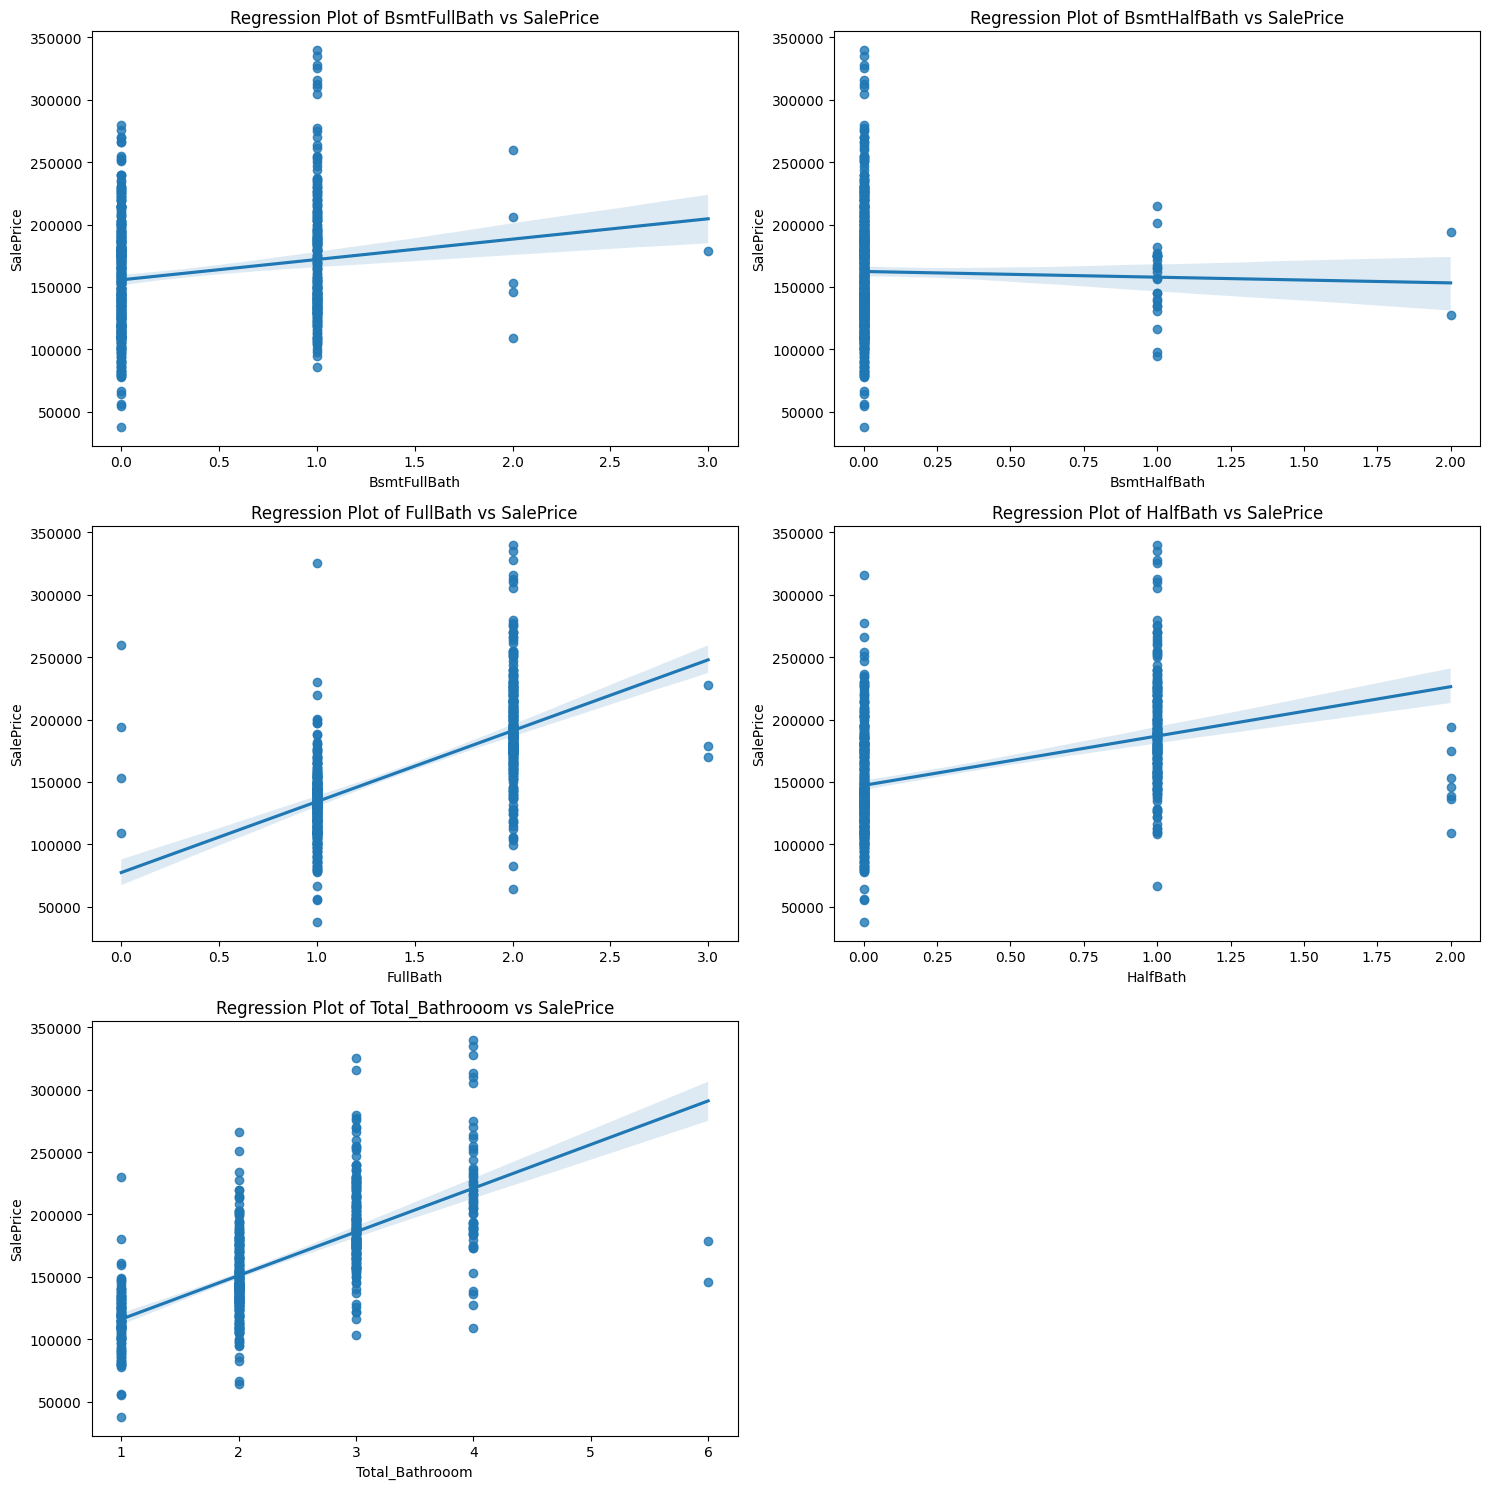

In [99]:
import math
num_plots = len(bath_col)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))


if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  


for i, column in enumerate(bath_col):
    sns.regplot(x=column, y='SalePrice', data=train_df, ax=axes[i])
    axes[i].set_title(f'Regression Plot of {column} vs SalePrice')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Drop Columns with Weak Correlation

In [100]:
train_df.drop(columns='BsmtHalfBath',inplace=True)
test_df.drop(columns='BsmtHalfBath',inplace=True)

In [101]:
train_df.shape,test_df.shape

((611, 71), (1459, 70))

In [102]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Sa

## Create Total_Porch_Square_Feet Column

In [103]:
train_df['Total_Porch_Square_Feet'] = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

In [104]:
test_df['Total_Porch_Square_Feet'] = test_df['WoodDeckSF'] + test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']

In [105]:
porch_feet = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','Total_Porch_Square_Feet']

In [106]:
train_df.shape,test_df.shape

((611, 72), (1459, 71))

# RegPlot for Porch_feet

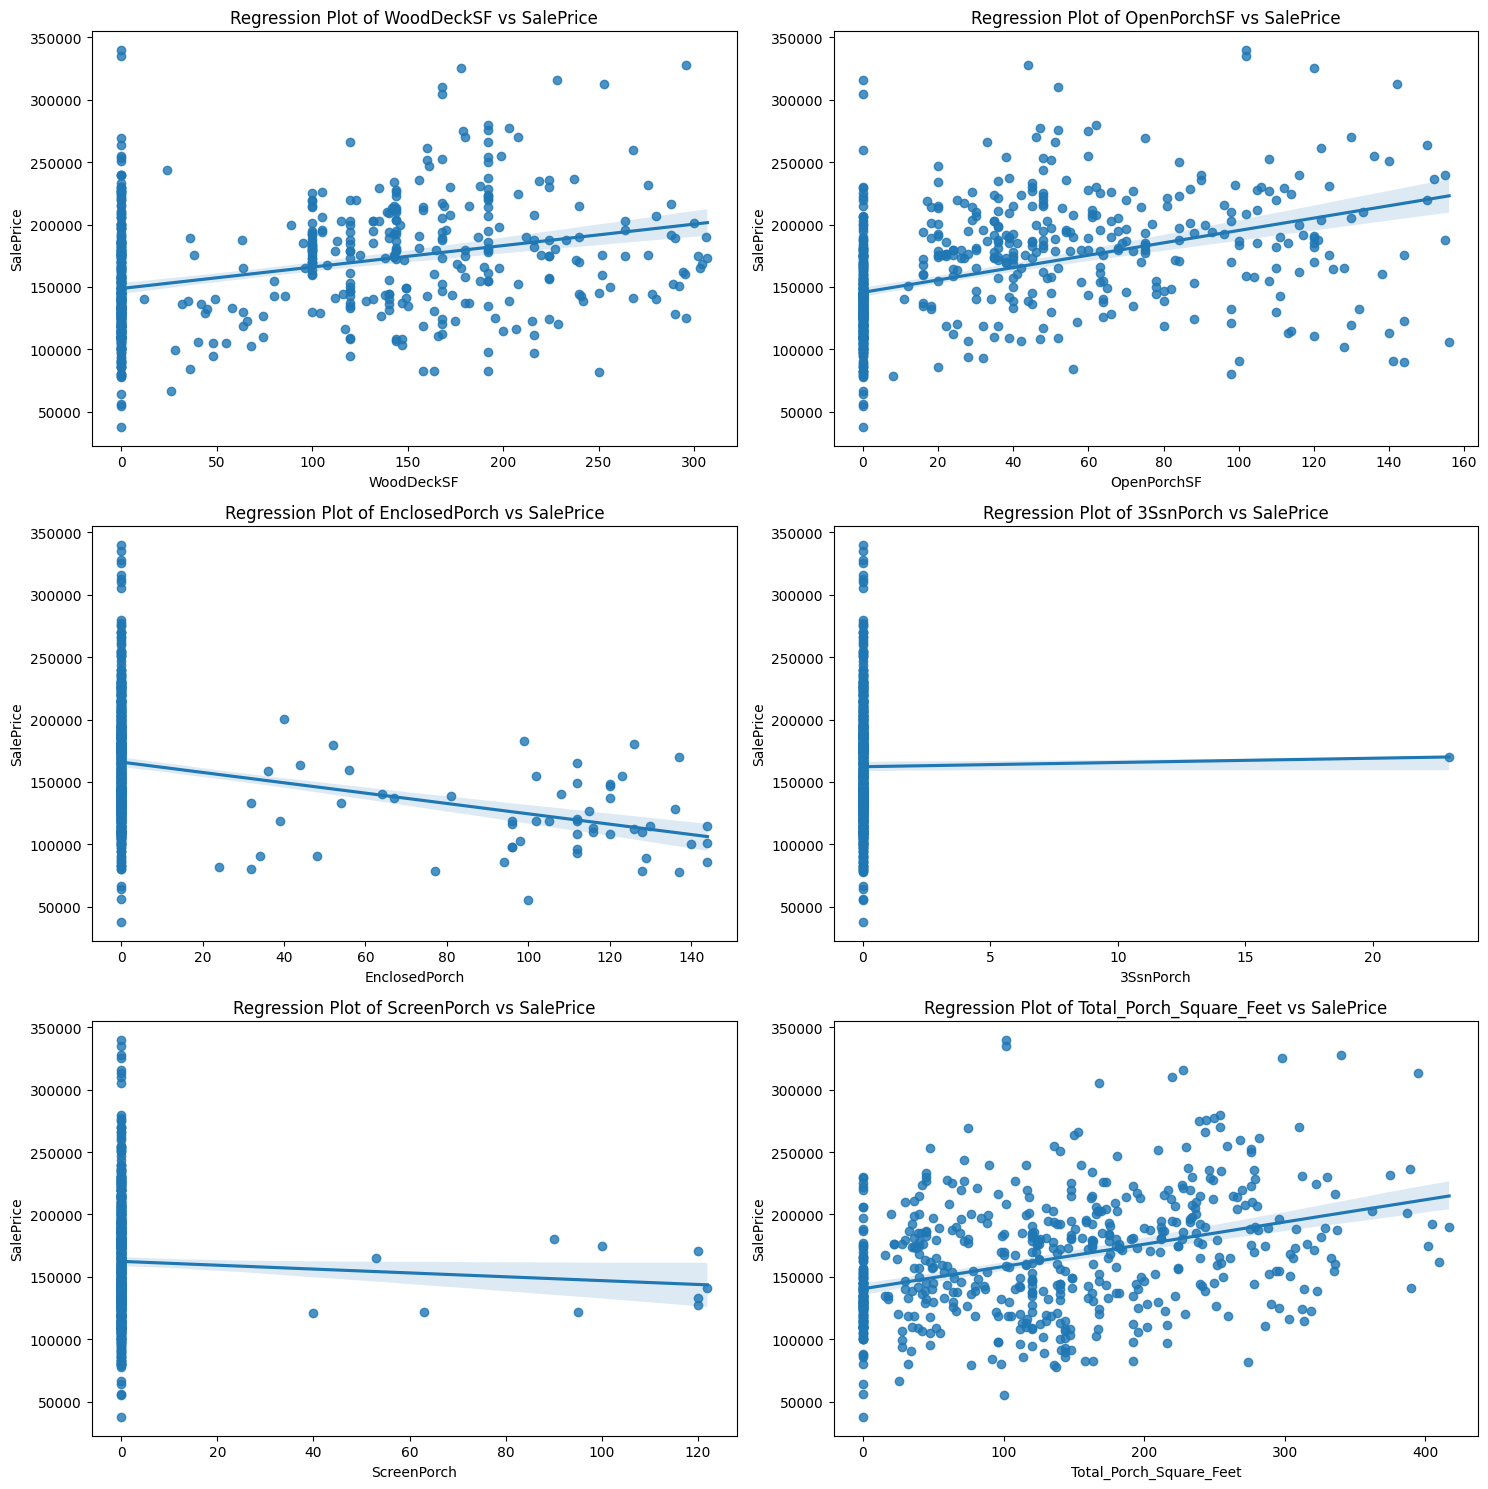

In [107]:
import math
num_plots = len(porch_feet)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))


if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] 


for i, column in enumerate(porch_feet):
    sns.regplot(x=column, y='SalePrice', data=train_df, ax=axes[i])
    axes[i].set_title(f'Regression Plot of {column} vs SalePrice')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Drop Columns with Weak Correlation

In [108]:
train_df.drop(columns=['ScreenPorch','3SsnPorch'],inplace=True)
test_df.drop(columns=['ScreenPorch','3SsnPorch'],inplace=True)

In [109]:
train_df.shape,test_df.shape

((611, 70), (1459, 69))

In [110]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition', 'S

In [111]:
# train_df['YearRemodAdd']

# Data Preprocessing 

In [112]:
cat_col = train_df.select_dtypes(include='object').columns

In [113]:
train_df.shape,test_df.shape

((611, 70), (1459, 69))

In [114]:
train_df.shape,test_df.shape

((611, 70), (1459, 69))

In [115]:
train_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
10            20       RL         70.0    11200   Pave      Reg         Lvl   
18            20       RL         66.0    13695   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1448          50       RL         70.0    11767   Pave      Reg         Lvl   
1450          90       RL         60.0     9000   Pave      Reg         Lvl   
1453          20       RL         90.0    17217   Pave      Reg         Lvl   
1454          20       FV         62.0     7500   Pave      Reg         Lvl   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0       Inside       Gtl      CollgCr  ...        0       0      2       WD   
2       Inside       Gtl      CollgCr  ...        0       0      9       WD   
4          FR2       Gtl      NoRidge  ...        0       0     12       WD   
10      Inside       Gtl       Sawyer  ...        0       0      2       WD   
18      Inside       Gtl      SawyerW  ...        0       0      6       WD   
...        ...       ...          ...  ...      ...     ...    ...      ...   
1448    Inside       Gtl      Edwards  ...        0       0      5       WD   
1450       FR2       Gtl        NAmes  ...        0       0      9       WD   
1453    Inside       Gtl      Mitchel  ...        0       0      7       WD   
1454    Inside       Gtl      Somerst  ...        0       0     10       WD   
1455    Inside       Gtl      Gilbert  ...        0       0      8       WD   

      SaleCondition  SalePrice  Year_At_Sale Total_Square_Feet  \
0            Normal     208500             5              3422   
2            Normal     223500             7              3626   
4            Normal     250000             8              4488   
10           Normal     129500            43              3120   
18           Normal     159000             4              3342   
...             ...        ...           ...               ...   
1448         Normal     112000            97              2466   
1450         Normal     136000            35              3584   
1453        Abnorml      84500             0              3420   
1454         Normal     185000             5              3663   
1455         Normal     175000             8              3553   

     Total_Bathrooom Total_Porch_Square_Feet  
0                  4                      61  
2                  4                      42  
4                  4                     276  
10                 2                       0  
18                 3                     102  
...              ...                     ...  
1448               2                     192  
1450               4                      77  
1453               1                      92  
1454               3                     113  
1455               3                      40  

[611 rows x 70 columns]

In [116]:
test_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             20       RH         80.0    11622   Pave      Reg         Lvl   
1             20       RL         81.0    14267   Pave      IR1         Lvl   
2             60       RL         74.0    13830   Pave      IR1         Lvl   
3             60       RL         78.0     9978   Pave      IR1         Lvl   
4            120       RL         43.0     5005   Pave      IR1         HLS   
...          ...      ...          ...      ...    ...      ...         ...   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1455         160       RM         21.0     1894   Pave      Reg         Lvl   
1456          20       RL        160.0    20000   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   
1458          60       RL         74.0     9627   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch PoolArea MiscVal  \
0       Inside       Gtl        NAmes  ...             0        0       0   
1       Corner       Gtl        NAmes  ...             0        0   12500   
2       Inside       Gtl      Gilbert  ...             0        0       0   
3       Inside       Gtl      Gilbert  ...             0        0       0   
4       Inside       Gtl      StoneBr  ...             0        0       0   
...        ...       ...          ...  ...           ...      ...     ...   
1454    Inside       Gtl      MeadowV  ...             0        0       0   
1455    Inside       Gtl      MeadowV  ...             0        0       0   
1456    Inside       Gtl      Mitchel  ...             0        0       0   
1457    Inside       Gtl      Mitchel  ...             0        0     700   
1458    Inside       Mod      Mitchel  ...             0        0       0   

     MoSold  SaleType  SaleCondition  Year_At_Sale Total_Square_Feet  \
0         6        WD         Normal            49            2660.0   
1         6        WD         Normal            52            3987.0   
2         3        WD         Normal            13            3485.0   
3         6        WD         Normal            12            3456.0   
4         1        WD         Normal            18            3840.0   
...     ...       ...            ...           ...               ...   
1454      6        WD         Normal            36            2184.0   
1455      4        WD        Abnorml            36            2184.0   
1456      9        WD        Abnorml            46            3672.0   
1457      7        WD         Normal            14            2794.0   
1458     11        WD         Normal            13            3992.0   

     Total_Bathrooom Total_Porch_Square_Feet  
0                1.0                     260  
1                2.0                     429  
2                3.0                     246  
3                3.0                     396  
4                2.0                     226  
...              ...                     ...  
1454             2.0                       0  
1455             2.0                      24  
1456             2.0                     474  
1457             2.0                     112  
1458             3.0                     238  

[1459 rows x 69 columns]

In [117]:
missing_values_test = train_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
missing_values_test

Series([], dtype: int64)

In [118]:
missing_in_test = set(train_df.columns) - set(test_df.columns)
missing_in_train = set(test_df.columns) - set(train_df.columns)

print(f"Columns in train but not in test: {missing_in_test}")
print(f"Columns in test but not in train: {missing_in_train}")

Columns in train but not in test: {'SalePrice'}
Columns in test but not in train: set()


In [119]:
train_df.shape

(611, 70)

In [120]:
train_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
10            20       RL         70.0    11200   Pave      Reg         Lvl   
18            20       RL         66.0    13695   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1448          50       RL         70.0    11767   Pave      Reg         Lvl   
1450          90       RL         60.0     9000   Pave      Reg         Lvl   
1453          20       RL         90.0    17217   Pave      Reg         Lvl   
1454          20       FV         62.0     7500   Pave      Reg         Lvl   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0       Inside       Gtl      CollgCr  ...        0       0      2       WD   
2       Inside       Gtl      CollgCr  ...        0       0      9       WD   
4          FR2       Gtl      NoRidge  ...        0       0     12       WD   
10      Inside       Gtl       Sawyer  ...        0       0      2       WD   
18      Inside       Gtl      SawyerW  ...        0       0      6       WD   
...        ...       ...          ...  ...      ...     ...    ...      ...   
1448    Inside       Gtl      Edwards  ...        0       0      5       WD   
1450       FR2       Gtl        NAmes  ...        0       0      9       WD   
1453    Inside       Gtl      Mitchel  ...        0       0      7       WD   
1454    Inside       Gtl      Somerst  ...        0       0     10       WD   
1455    Inside       Gtl      Gilbert  ...        0       0      8       WD   

      SaleCondition  SalePrice  Year_At_Sale Total_Square_Feet  \
0            Normal     208500             5              3422   
2            Normal     223500             7              3626   
4            Normal     250000             8              4488   
10           Normal     129500            43              3120   
18           Normal     159000             4              3342   
...             ...        ...           ...               ...   
1448         Normal     112000            97              2466   
1450         Normal     136000            35              3584   
1453        Abnorml      84500             0              3420   
1454         Normal     185000             5              3663   
1455         Normal     175000             8              3553   

     Total_Bathrooom Total_Porch_Square_Feet  
0                  4                      61  
2                  4                      42  
4                  4                     276  
10                 2                       0  
18                 3                     102  
...              ...                     ...  
1448               2                     192  
1450               4                      77  
1453               1                      92  
1454               3                     113  
1455               3                      40  

[611 rows x 70 columns]

In [121]:
test_df.shape

(1459, 69)

In [122]:
categorical_columns = train_df.select_dtypes(include='object').columns

In [123]:
# le_train_dict = {}
# for column in categorical_columns:
#     le = LabelEncoder()
#     le.fit(train_df[column])
#     le_train_dict[column] = le
#     train_df[column] = le.transform(train_df[column])

In [124]:
categorical_columns_test = test_df.select_dtypes(include='object').columns

In [125]:
label_encoder = LabelEncoder()

In [126]:
for col in categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

In [127]:
for col in categorical_columns_test:
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [128]:
# le_test_dict = {}
# for column in categorical_columns_test:
#     le = LabelEncoder()
#     le.fit(test_df[column])
#     le_test_dict[column] = le
#     test_df[column] = le.transform(test_df[column])

In [129]:
train_df.shape,test_df.shape

((611, 70), (1459, 69))

In [130]:
X = train_df.drop(columns='SalePrice')
y = train_df['SalePrice']

In [131]:
#from sklearn.preprocessing import MinMaxScaler
#mc=MinMaxScaler()
#X=mc.fit_transform(X)

In [132]:
#scaler = RobustScaler()

In [133]:
#X = scaler.fit_transform(X)

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [135]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((488, 69), (123, 69), (488,), (123,))

In [136]:
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror')
}

In [137]:
# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Manually calculate RMSE for original values
    rmse = np.sqrt(mse)
    
    # Manually calculate MSLE
    log_y_pred = np.log1p(y_pred)
    log_y_test = np.log1p(y_test)
    msle = np.mean((log_y_pred - log_y_test) ** 2)
    
    # Calculate RMSLE
    rmsle = np.sqrt(msle)
    
    model_performance[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse,
        'Mean Squared Logarithmic Error': msle,
        'Root Mean Squared Logarithmic Error': rmsle
    }
    
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Squared Logarithmic Error: {msle}")
    print(f"Root Mean Squared Logarithmic Error: {rmsle}\n")

# Convert the performance dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance).T
performance_df


Linear Regression:
Mean Squared Error: 388802577.42115897
Mean Absolute Error: 14224.436334054819
R^2 Score: 0.7787537747260213
Root Mean Squared Error: 19718.077427101227
Mean Squared Logarithmic Error: 0.024184338637754925
Root Mean Squared Logarithmic Error: 0.15551314618949397

Support Vector Regressor:
Mean Squared Error: 1770230823.7804792
Mean Absolute Error: 34305.311331723766
R^2 Score: -0.007341284162388773
Root Mean Squared Error: 42074.111087228914
Mean Squared Logarithmic Error: 0.07997963335266481
Root Mean Squared Logarithmic Error: 0.2828067066967557

Random Forest Regressor:
Mean Squared Error: 275368822.76158375
Mean Absolute Error: 11471.544227642275
R^2 Score: 0.8433027039114886
Root Mean Squared Error: 16594.24065034564
Mean Squared Logarithmic Error: 0.014402054823453749
Root Mean Squared Logarithmic Error: 0.12000856145897987

Gradient Boosting Regressor:
Mean Squared Error: 255647858.43909898
Mean Absolute Error: 10321.731773596855
R^2 Score: 0.8545248232298652


Mean Squared Error  Mean Absolute Error  \
Linear Regression                  3.888026e+08         14224.436334   
Support Vector Regressor           1.770231e+09         34305.311332   
Random Forest Regressor            2.753688e+08         11471.544228   
Gradient Boosting Regressor        2.556479e+08         10321.731774   
AdaBoost Regressor                 3.298507e+08         12690.228808   
XGBoost Regressor                  2.721938e+08         12024.543509   

                             R^2 Score  Root Mean Squared Error  \
Linear Regression             0.778754             19718.077427   
Support Vector Regressor     -0.007341             42074.111087   
Random Forest Regressor       0.843303             16594.240650   
Gradient Boosting Regressor   0.854525             15988.991789   
AdaBoost Regressor            0.812300             18161.793494   
XGBoost Regressor             0.845109             16498.295934   

                             Mean Squared Logarithmic Error  \
Linear Regression                                  0.024184   
Support Vector Regressor                           0.079980   
Random Forest Regressor                            0.014402   
Gradient Boosting Regressor                        0.013673   
AdaBoost Regressor                                 0.016814   
XGBoost Regressor                                  0.014834   

                             Root Mean Squared Logarithmic Error  
Linear Regression                                       0.155513  
Support Vector Regressor                                0.282807  
Random Forest Regressor                                 0.120009  
Gradient Boosting Regressor                             0.116934  
AdaBoost Regressor                                      0.129670  
XGBoost Regressor                                       0.121794

In [138]:
# Define custom scorers
def rmse_log_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_log_scorer = make_scorer(rmse_log_scorer, greater_is_better=False)

In [139]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('xgboost', XGBRegressor(objective='reg:squarederror', n_estimators=100))  # XGBoost model
])

# Define the parameter grid
param_grid = {
    'xgboost__max_depth': [3, 5, 7,9],
    'xgboost__learning_rate': [0.01, 0.1, 0.2,0.3],
    'xgboost__n_estimators': [100, 200,250, 300],
    'xgboost__subsample': [0.7,0.8, 0.9, 1.0],
    'xgboost__colsample_bytree': [0.7,0.8, 0.9, 1.0]
}
# Set up GridSearchCV with multiple metrics
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=rmse_log_scorer,
    refit='rmse_log',  # Choose which metric to use for refitting
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_xgboost_model = grid_search.best_estimator_


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


In [140]:
print("Best Parameters:", grid_search.best_params_)
# #print("Best Model:", best_model)

Best Parameters: {'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 300, 'xgboost__subsample': 0.9}


In [141]:
#{'mse': mse_scorer, 'mae': mae_scorer, 'rmse_log': rmse_log_scorer}

In [142]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = best_xgboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(np.log1p(y_test), np.log1p(y_pred))
rmse = np.sqrt(mse)
print(f'RMSE-Log: {rmse}')


RMSE-Log: 0.11867511118908441


In [143]:
# Assuming you have a separate test set for submission
#test_df = pd.read_csv('test_set.csv')
#test_X = test_df.drop('Id', axis=1)  # Drop any non-feature columns

# Make predictions on the test set
test_predictions = best_xgboost_model.predict(test_df)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


In [144]:
pd.read_csv('/kaggle/working/submission.csv').head(15)

Id  SalePrice
0   1461  130697.24
1   1462  164988.61
2   1463  183618.92
3   1464  191975.61
4   1465  180769.50
5   1466  177696.39
6   1467  175435.52
7   1468  165073.50
8   1469  181084.22
9   1470  120846.47
10  1471  203351.05
11  1472  104187.52
12  1473  102052.23
13  1474  151891.34
14  1475  121878.31

In [145]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

In [146]:
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Scale features robustly
#     ('gradientboosting', GradientBoostingRegressor())  # Gradient Boosting model
# ])

# # Define the parameter grid
# param_grid = {
#     'gradientboosting__n_estimators': [100, 200, 300],
#     'gradientboosting__learning_rate': [0.01, 0.1, 0.2],
#     'gradientboosting__max_depth': [3, 5, 7],
#     'gradientboosting__min_samples_split': [2, 5, 10],
#     'gradientboosting__min_samples_leaf': [1, 2, 4]
# }


In [147]:
# # Set up GridSearchCV with multiple metrics
# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     scoring=rmse_log_scorer,
#     refit='rmse_log',  # Choose which metric to use for refitting
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

In [148]:
# # Get the best model
# best_gradientboosting_model = grid_search.best_estimator_

# # Make predictions
# y_pred = best_gradientboosting_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(np.log1p(y_test), np.log1p(y_pred))
# rmse = np.sqrt(mse)
# print(f'RMSE-Log: {rmse}')

In [149]:
# # Make predictions on the test set
# test_predictions = best_gradientboosting_model.predict(test_df)

# # Create submission DataFrame
# submission = pd.DataFrame({
#     'Id': test_ids,
#     'SalePrice': test_predictions
# })

# # Save to CSV
# submission.to_csv('submission.csv', index=False)

In [150]:
# pd.read_csv('/kaggle/working/submission.csv')